In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.plotting import register_matplotlib_converters
from datetime import datetime 
from collections import Counter
import re
from scipy import stats
import plotly.express as px
from matplotlib.dates import DateFormatter
from scipy.spatial import cKDTree
from scipy import inf


import warnings 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)
warnings.filterwarnings('ignore')

In [2]:
colors2 = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
colors1 = ["#6dccda", "#cdcc5d", "#a2a2a2", "#ed97ca", "#a8786e", "#ad8bc9", "#ed665d", "#67bf5c", "#ff9e4a", "#729ece"]
colors3 = ["#ed665d", "#67bf5c", "#ff9e4a", "#729ece", "#ad8bc9"]
colors4 = [ "#729ece", "#67bf5c", "#ff9e4a", "#ad8bc9", "#ed665d"]
colors5 = [ "#6dccda", "#ed97ca", "#729ece", "#ad8bc9", "#ff9e4a"]

In [63]:
hsv = plt.get_cmap('hsv')
colors = hsv(np.linspace(0, 1.0, 20))

In [64]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

In [65]:
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

## Loading Data¶

In [3]:
dataset = pd.read_csv('madrid2.csv')
dataset.head()

Scrap_date  index   Area            District Elevator_class   Ext_int  \
0    20191004    120  189.0           salamanca            con  exterior   
1    20191004   9037   92.0              retiro            sin  exterior   
2    20191004   9039  115.0           hortaleza            con  exterior   
3    20191004   9048   85.0              centro            sin  exterior   
4    20191004   9052   90.0  puente_de_vallecas            con  exterior   

   Floor_num Garage_opt_inc  Garage_price        Lat       Lon  New   Nudo  \
0        1.0            inc           0.0  40.431277 -3.676940  NaN  False   
1        2.0              0           0.0  40.412180 -3.667154  NaN  False   
2        4.0            inc           0.0  40.488869 -3.647135  NaN  False   
3        2.0              0           0.0  40.423765 -3.697799  NaN  False   
4        3.0              0           0.0  40.380525 -3.668974  NaN  False   

      Price          Quarter  Rooms_num  \
0  920000.0            lista        4.0   
1  360000.0         estrella        3.0   
2  355000.0      sanchinarro        2.0   
3  430000.0  chueca_justicia        2.0   
4  149900.0        entrev_as        3.0   

                                     Source URL         Year  
0  https://www.idealista.com/inmueble/87208132/  1989.000000  
1  https://www.idealista.com/inmueble/86718709/  1982.965873  
2  https://www.idealista.com/inmueble/86718422/  1982.965873  
3  https://www.idealista.com/inmueble/86717146/  1982.965873  
4  https://www.idealista.com/inmueble/86716878/  1982.965873

## Getting Data Overview

In [4]:
dataset.describe()

Scrap_date         index           Area     Floor_num   Garage_price  \
count  4.196100e+04  41961.000000   41961.000000  41961.000000   41961.000000   
mean   2.019711e+07   8976.969638     125.811682      2.634804     808.972308   
std    4.650223e+03   7732.122634    2251.484609      2.394662    6922.327038   
min    2.019100e+07      0.000000      12.000000     -1.000000       0.000000   
25%    2.019100e+07   2888.000000      62.000000      1.000000       0.000000   
50%    2.020032e+07   6520.000000      83.000000      2.000000       0.000000   
75%    2.020082e+07  13201.000000     120.000000      4.000000       0.000000   
max    2.020120e+07  28042.000000  385000.000000     60.000000  500000.000000   

                Lat           Lon         Price     Rooms_num          Year  
count  41961.000000  41961.000000  4.196100e+04  41961.000000  41961.000000  
mean      40.421731     -3.686179  4.260107e+05      2.656562   1982.049100  
std        0.034111      0.039904  5.153465e+05      1.208956     11.999448  
min       40.333684     -3.833992  1.300000e+04      1.000000   1900.000000  
25%       40.396648     -3.709615  1.620000e+05      2.000000   1981.495795  
50%       40.423859     -3.694620  2.700000e+05      3.000000   1981.978717  
75%       40.444004     -3.665483  4.800000e+05      3.000000   1982.965873  
max       40.607646     -3.527254  1.100726e+07     18.000000   2019.000000

In [5]:
duplicateRowsDF = dataset[dataset.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Scrap_date, index, Area, District, Elevator_class, Ext_int, Floor_num, Garage_opt_inc, Garage_price, Lat, Lon, New, Nudo, Price, Quarter, Rooms_num, Source URL, Year]
Index: []


In [6]:
list(dataset.columns)

['Scrap_date',
 'index',
 'Area',
 'District',
 'Elevator_class',
 'Ext_int',
 'Floor_num',
 'Garage_opt_inc',
 'Garage_price',
 'Lat',
 'Lon',
 'New',
 'Nudo',
 'Price',
 'Quarter',
 'Rooms_num',
 'Source URL',
 'Year']

Text(0, 0.5, 'Data type')

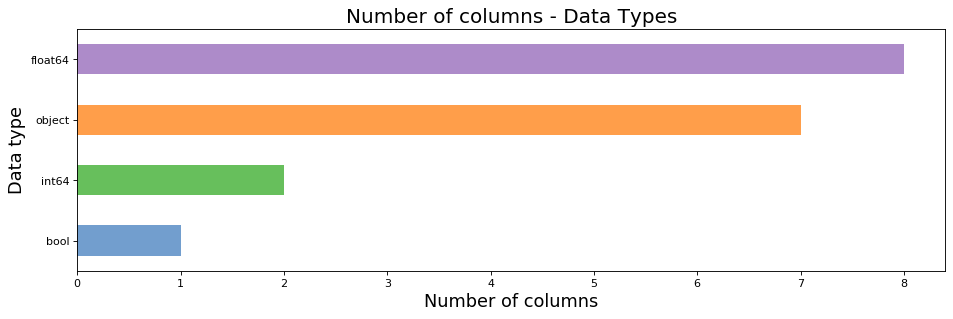

In [7]:
# Number of each type of column
plt.figure(figsize=(14, 4), dpi=80)
dataset.dtypes.value_counts().sort_values().plot(kind='barh', color=[ "#729ece", "#67bf5c", "#ff9e4a", "#ad8bc9", "#ed665d"])
plt.title('Number of columns - Data Types',fontsize=18)
plt.xlabel('Number of columns',fontsize=16)
plt.ylabel('Data type',fontsize=16)

### 1.1 General Exploratory Data


1.1.2 Null Values Inspection ¶

In [8]:

def counting_nullval (df):
    nanval_perct = ((100 * df.isnull().sum()) / len(df))
    nanval = df.isnull().sum()
    
    #creating a table 
    
    nanvaltable = pd.concat([nanval,nanval_perct], axis =1)
    nanvaltable = nanvaltable.rename(columns = \
                        {0 : 'Sum_MissingValues', 1 : 'Perc_MissingValues'  })
   
    #Now that we got a table with this information, 
    #I am going to proceed to extract only the variables with null values
    
    filtered_null_data = nanvaltable[nanvaltable.Perc_MissingValues !=0].sort_values(\
                                                        'Perc_MissingValues', ascending=False).round({'Perc_MissingValues':3})
    
    return filtered_null_data

In [9]:
missing_values = counting_nullval(dataset)
missing_values.head(5)

Sum_MissingValues  Perc_MissingValues
New              11296               26.92

In [10]:
VAR_OBJ_2CHECK = list(dataset.select_dtypes(['object']).columns)
VAR_OBJ_2CHECK

['District',
 'Elevator_class',
 'Ext_int',
 'Garage_opt_inc',
 'New',
 'Quarter',
 'Source URL']

1.1.4 Categorical variables - Inspection

In [11]:
object_data = pd.DataFrame(dataset.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
object_data = object_data.rename(columns = {0 : 'Sum_Objtype'})
#object_data 
Obj_data_sort = object_data.sort_values('Sum_Objtype', ascending=False)
Obj_data_sort.head(7)

Sum_Objtype
Source URL            41961
Quarter                 136
District                 21
Garage_opt_inc            3
Elevator_class            2
Ext_int                   2
New                       2

In [12]:
Obj_data_sort_cutoff = object_data
Obj_data_sort_cutoff['Sum_Objtype'] = Obj_data_sort_cutoff['Sum_Objtype'].apply (\
                            lambda x:30 if x>30 else x)


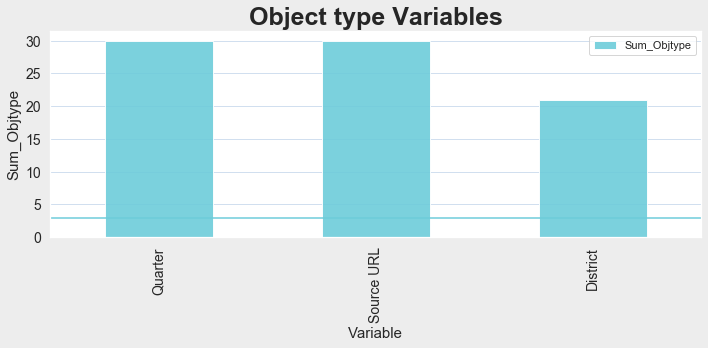

In [13]:
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'#EDEDED'})
sns.set_palette(colors5)
Obj_data_sort_cutoff[Obj_data_sort_cutoff.Sum_Objtype>4].sort_values('Sum_Objtype', \
    ascending=False).plot(kind='bar', figsize=(10, 5), alpha=0.9, rot=90, fontsize=9)


plt.axhline(y=3, linestyle='-')

plt.xlabel('Variable', fontsize=15)
plt.ylabel('Sum_Objtype', fontsize=15)
plt.title('Object type Variables', fontsize=25, fontweight='bold')
plt.grid(color="#729ece", axis='y', alpha=0.4, lw=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [14]:
dataset['District'].unique()

array(['salamanca', 'retiro', 'hortaleza', 'centro', 'puente_de_vallecas',
       'carabanchel', 'tetu_n', 'chamart_n', 'ciudad_lineal', 'latina',
       'arganzuela', 'fuencarral', 'villaverde', 'chamber_', 'usera',
       'moncloa', 'san_blas', 'vic_lvaro', 'villa_de_vallecas',
       'moratalaz', 'barajas'], dtype=object)

In [15]:
dataset['Elevator_class'].unique()

array(['con', 'sin'], dtype=object)

In [16]:
dataset['Ext_int'].unique()

array(['exterior', 'interior'], dtype=object)

In [17]:
dataset['Garage_opt_inc'].unique()

array(['inc', '0', 'opt'], dtype=object)

In [18]:
dataset['New'].unique()

array([nan, True, False], dtype=object)

In [19]:
dataset['Quarter'].unique()

array(['lista', 'estrella', 'sanchinarro', 'chueca_justicia', 'entrev_as',
       'san_isidro', 'ventilla_almenara', 'prosperidad', 'guindalera',
       'quintana', 'aluche', 'palacio', 'imperial', 'pe_agrande',
       'huertas_cortes', 'los_rosales', 'san_andr_s', 'bellas_vistas',
       'trafalgar', 'san_ferm_n', 'malasa_a_universidad', 'castilla',
       'la_paz', 'pac_fico', 'opa_el', 'berruguete', 'pradolongo',
       'arg_elles', 'butarque', 'pueblo_nuevo', 'arcos', 'nueva_espa_a',
       'palomeras_sureste', 'jer_nimos', '12_de_octubre_orcasur',
       'nuevos_ministerios_r_os_rosas', 'palos_de_moguer',
       'valdeacederas', 'vista_alegre', 'palomeras_bajas', 'lucero',
       'aravaca', 'ventas', 'cuatro_caminos', 'delicias',
       'ciudad_universitaria', 'amposta', 'el_ca_averal_los_berrocales',
       'san_crist_bal', 'puerta_bonita', 'palomas', '_guilas',
       'buena_vista', 'ciudad_jard_n', 'almagro', 'goya', 'sol',
       'mirasierra', 'arapiles', 'comillas', 'pinar_de

In [20]:
dataset['Source URL'].unique() 

array(['https://www.idealista.com/inmueble/87208132/',
       'https://www.idealista.com/inmueble/86718709/',
       'https://www.idealista.com/inmueble/86718422/', ...,
       'https://www.idealista.com/inmueble/91391616/',
       'https://www.idealista.com/inmueble/91381925/',
       'https://www.idealista.com/inmueble/91391009/'], dtype=object)

### Uderstanding the dataset: Looking for outlayers 

In [21]:
#price/1000 for better display
Price_M = dataset['Price']/1000
dataset.drop(['Price'], axis = 1) 
dataset['Price_M'] = Price_M

In [22]:
VAR_ORI = list(dataset.columns)
VAR_ORI

['Scrap_date',
 'index',
 'Area',
 'District',
 'Elevator_class',
 'Ext_int',
 'Floor_num',
 'Garage_opt_inc',
 'Garage_price',
 'Lat',
 'Lon',
 'New',
 'Nudo',
 'Price',
 'Quarter',
 'Rooms_num',
 'Source URL',
 'Year',
 'Price_M']

In [23]:
VAR_REORDER = [
 'Scrap_date',
 'index',
 'Area',
 'Quarter',
 'District',
 'Price_M',
 'Year',
 'Rooms_num',
 'Elevator_class',
 'Ext_int',
 'Floor_num',
 'Garage_opt_inc',
 'Garage_price',
 'Lat',
 'Lon',
 'New',
 'Nudo',
 'Source URL'
]
df =dataset.reindex(columns=VAR_REORDER)
df

Scrap_date  index   Area               Quarter            District  \
0        20191004    120  189.0                 lista           salamanca   
1        20191004   9037   92.0              estrella              retiro   
2        20191004   9039  115.0           sanchinarro           hortaleza   
3        20191004   9048   85.0       chueca_justicia              centro   
4        20191004   9052   90.0             entrev_as  puente_de_vallecas   
...           ...    ...    ...                   ...                 ...   
41956    20201202  17697   65.0            campamento              latina   
41957    20201202  17660  123.0                   sol              centro   
41958    20201202  17763  120.0             orcasitas               usera   
41959    20201202  17671  120.0  malasa_a_universidad              centro   
41960    20201202  17757  284.0               almagro            chamber_   

       Price_M         Year  Rooms_num Elevator_class   Ext_int  Floor_num  \
0        920.0  1989.000000        4.0            con  exterior        1.0   
1        360.0  1982.965873        3.0            sin  exterior        2.0   
2        355.0  1982.965873        2.0            con  exterior        4.0   
3        430.0  1982.965873        2.0            sin  exterior        2.0   
4        149.9  1982.965873        3.0            con  exterior        3.0   
...        ...          ...        ...            ...       ...        ...   
41956    104.9  1947.000000        3.0            con  exterior        0.0   
41957    790.0  1919.000000        1.0            con  exterior        3.0   
41958    299.0  1982.134086        3.0            con  exterior        7.0   
41959    975.0  1982.134086        1.0            con  exterior        6.0   
41960   1300.0  1982.134086        4.0            con  exterior        3.0   

      Garage_opt_inc  Garage_price        Lat       Lon    New   Nudo  \
0                inc           0.0  40.431277 -3.676940    NaN  False   
1                  0           0.0  40.412180 -3.667154    NaN  False   
2                inc           0.0  40.488869 -3.647135    NaN  False   
3                  0           0.0  40.423765 -3.697799    NaN  False   
4                  0           0.0  40.380525 -3.668974    NaN  False   
...              ...           ...        ...       ...    ...    ...   
41956              0           0.0  40.398671 -3.772008  False  False   
41957              0           0.0  40.419036 -3.699779  False  False   
41958            inc           0.0  40.365346 -3.710498  False  False   
41959              0           0.0  40.423372 -3.707792  False  False   
41960              0           0.0  40.433862 -3.695287  False  False   

                                         Source URL  
0      https://www.idealista.com/inmueble/87208132/  
1      https://www.idealista.com/inmueble/86718709/  
2      https://www.idealista.com/inmueble/86718422/  
3      https://www.idealista.com/inmueble/86717146/  
4      https://www.idealista.com/inmueble/86716878/  
...                                             ...  
41956  https://www.idealista.com/inmueble/91384490/  
41957  https://www.idealista.com/inmueble/91381081/  
41958  https://www.idealista.com/inmueble/91391616/  
41959  https://www.idealista.com/inmueble/91381925/  
41960  https://www.idealista.com/inmueble/91391009/  

[41961 rows x 18 columns]

In [24]:
ftop_price = df.sort_values(['Price_M'], ascending=False)
ftop_price.head(10)

Scrap_date  index    Area     Quarter   District    Price_M  \
8814     20191004  25413   803.0  castellana  salamanca  11007.265   
8675     20191004  24658   803.0  castellana  salamanca  11007.226   
2594     20191004  11101   600.0   recoletos  salamanca  11000.000   
8815     20191004  25412   783.0  castellana  salamanca  10731.073   
33145    20200822   4945  1798.0   arg_elles    moncloa   9250.000   
18919    20200129    499   800.0   jer_nimos     retiro   8800.000   
30866    20200822   6019   881.0     el_viso  chamart_n   8700.000   
40402    20201202  26360   881.0     el_viso  chamart_n   8700.000   
23855    20200320   1860   856.0     el_viso  chamart_n   8700.000   
35539    20201021   1600   881.0     el_viso  chamart_n   8700.000   

              Year  Rooms_num Elevator_class   Ext_int  Floor_num  \
8814   1923.000000        3.0            con  exterior        1.0   
8675   1982.965873        3.0            con  exterior        6.0   
2594   1982.965873        5.0            con  exterior        5.0   
8815   1923.000000        3.0            con  exterior        1.0   
33145  1981.677561        1.0            con  exterior        1.0   
18919  1980.683142        6.0            con  exterior        5.0   
30866  1981.677561        4.0            sin  interior        1.0   
40402  1982.134086        7.0            sin  interior        1.0   
23855  1979.660606        7.0            sin  exterior        3.0   
35539  1981.495795        7.0            sin  interior        1.0   

      Garage_opt_inc  Garage_price        Lat       Lon   New   Nudo  \
8814               0           0.0  40.436231 -3.684505   NaN  False   
8675               0           0.0  40.435469 -3.687145   NaN  False   
2594               0           0.0  40.423859 -3.686638   NaN  False   
8815               0           0.0  40.436231 -3.684505   NaN  False   
33145              0           0.0  40.429414 -3.721413  True  False   
18919              0           0.0  40.415072 -3.693278  True  False   
30866            inc           0.0  40.449021 -3.686681  True  False   
40402            inc           0.0  40.446622 -3.681722  True  False   
23855            inc           0.0  40.444949 -3.685684  True  False   
35539              0           0.0  40.445067 -3.685179  True  False   

                                         Source URL  
8814   https://www.idealista.com/inmueble/81689858/  
8675   https://www.idealista.com/inmueble/82590629/  
2594   https://www.idealista.com/inmueble/86474091/  
8815   https://www.idealista.com/inmueble/81689879/  
33145   https://www.idealista.com/inmueble/90358617  
18919  https://www.idealista.com/inmueble/88464123/  
30866   https://www.idealista.com/inmueble/90279971  
40402  https://www.idealista.com/inmueble/91978186/  
23855  https://www.idealista.com/inmueble/88966375/  
35539  https://www.idealista.com/inmueble/91414290/

In [25]:
VAR_NUM_2CHECK =  [
 'Scrap_date',
 'Area',
 'Price_M',
 'Year',
 'Rooms_num',
 'Floor_num',
 'Garage_price',
 'Lat',
 'Lon',
]


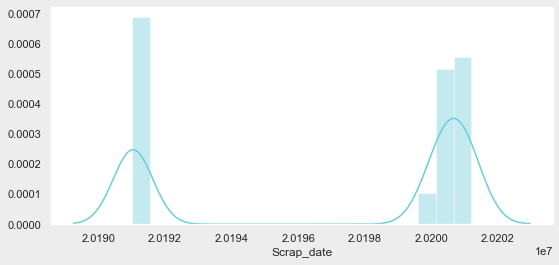

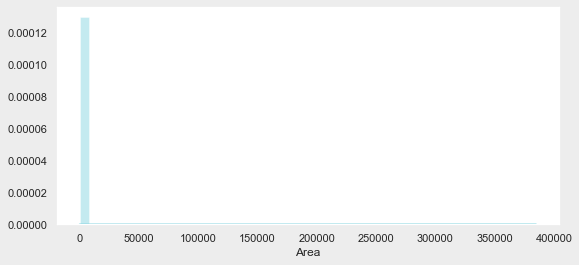

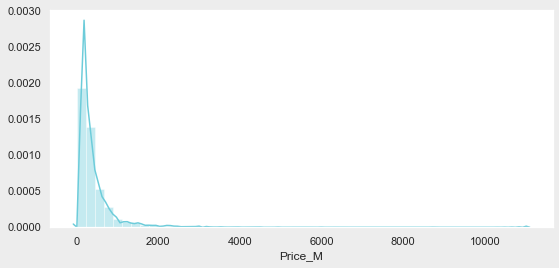

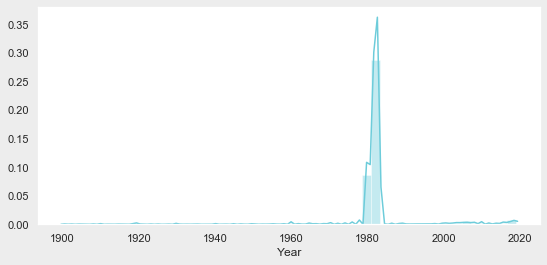

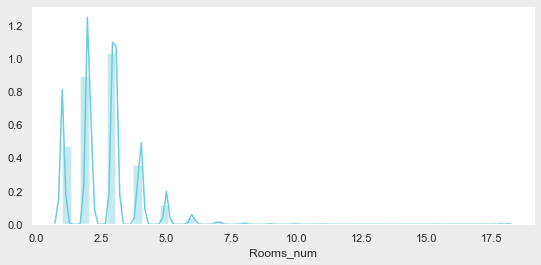

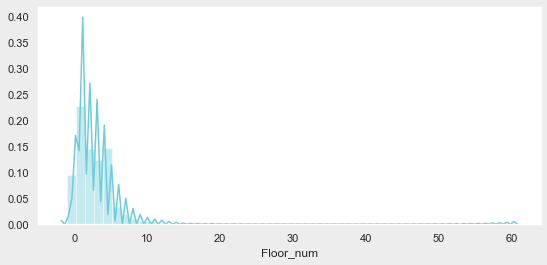

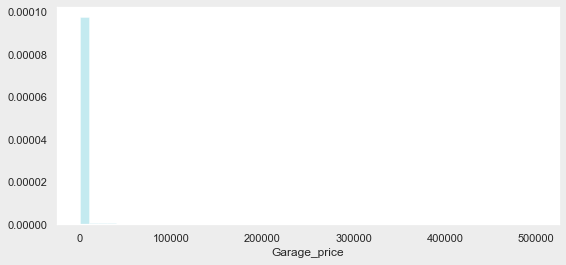

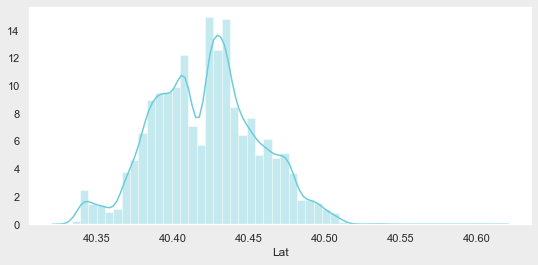

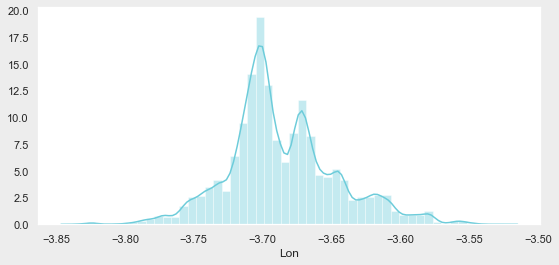

In [26]:
for feature in VAR_NUM_2CHECK:
    plt.figure(figsize=(9, 4))
    sns.set_palette(colors5)
    sns.distplot(dataset[feature])

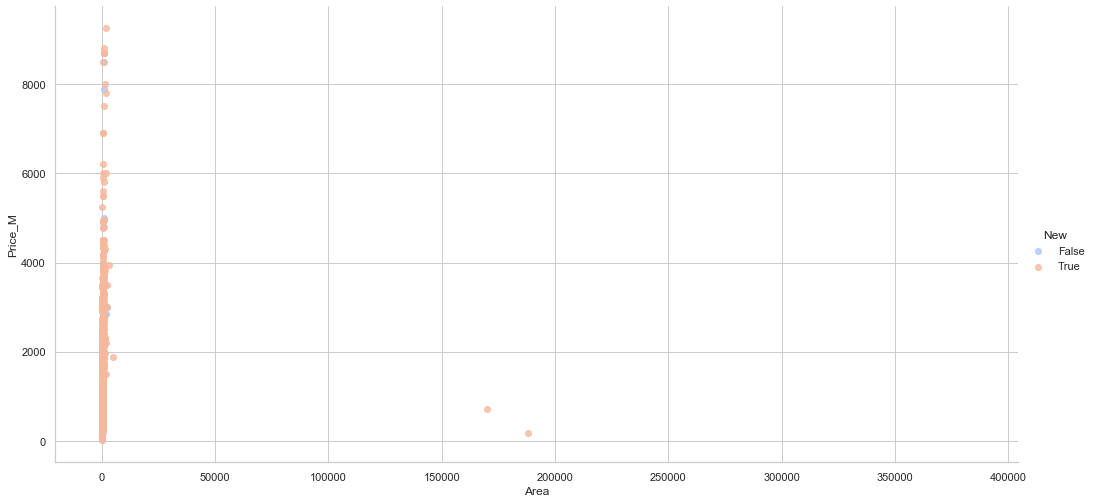

In [27]:

sns.set_style('whitegrid')
g=sns.lmplot('Area','Price_M',data=df, hue='New',
           palette='coolwarm',size=15, aspect=1, fit_reg=False)

g.fig.set_figwidth(15.27)
g.fig.set_figheight(6.7)

In [28]:
df['Price_M'].describe()

count    41961.000000
mean       426.010700
std        515.346526
min         13.000000
25%        162.000000
50%        270.000000
75%        480.000000
max      11007.265000
Name: Price_M, dtype: float64

In [29]:
df['Area'].describe()

count     41961.000000
mean        125.811682
std        2251.484609
min          12.000000
25%          62.000000
50%          83.000000
75%         120.000000
max      385000.000000
Name: Area, dtype: float64

In [30]:
price_mean = round(np.mean(df['Price_M']),2)
print('The price_original mean on the housing is:', price_mean)

The price_original mean on the housing is: 426.01


In [31]:
price_median = round(np.median(df['Price_M']),2)
print('The price median on the housing is:', price_median)

The price median on the housing is: 270.0


In [32]:
price_std = round(np.std(df['Price_M']),2)
print('The price std on the housing is:', price_std)

The price std on the housing is: 515.34


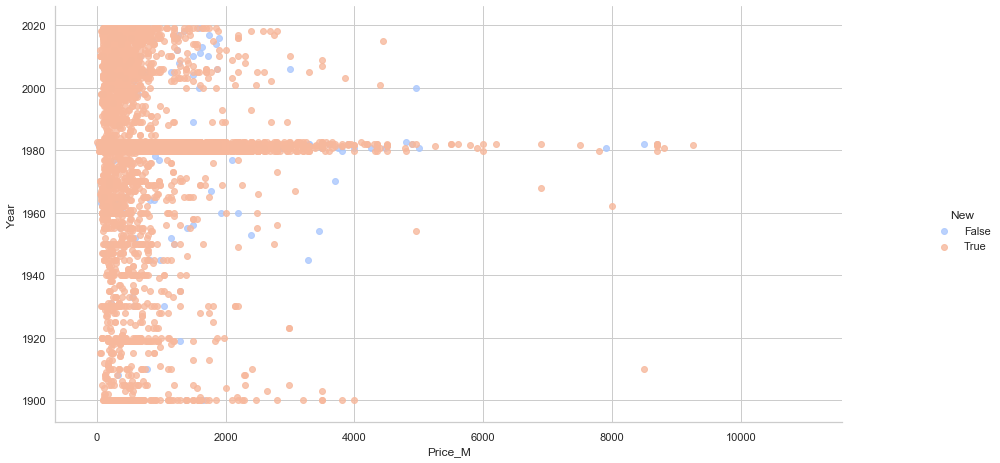

In [33]:
sns.set_style('whitegrid')
g=sns.lmplot('Price_M','Year',data=df, hue='New',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)
g.fig.set_figwidth(15.27)
g.fig.set_figheight(6.7)

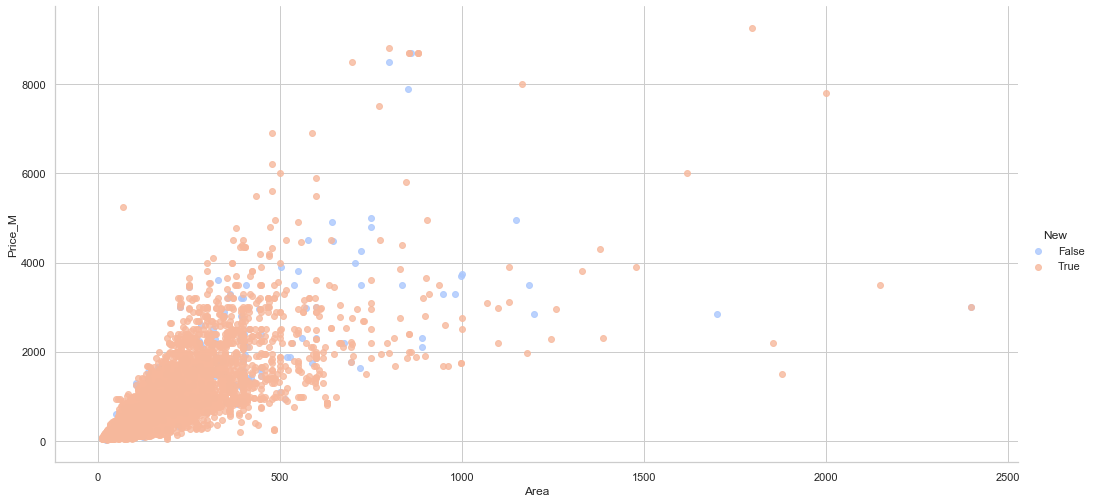

In [34]:
df2 = df.copy()
df2 = df2[df2['Area'] < 3000]
sns.set_style('whitegrid')
g=sns.lmplot('Area','Price_M',data=df2, hue='New',
           palette='coolwarm',size=15,aspect=1,fit_reg=False)
g.fig.set_figwidth(15.27)
g.fig.set_figheight(6.7)

In [35]:
df2['Price_M'].describe()

count    41956.000000
mean       425.880879
std        515.033802
min         13.000000
25%        162.000000
50%        270.000000
75%        480.000000
max      11007.265000
Name: Price_M, dtype: float64

In [36]:
df2['Area'].describe()

count    41956.000000
mean       107.920941
std         94.397811
min         12.000000
25%         62.000000
50%         83.000000
75%        120.000000
max       2400.000000
Name: Area, dtype: float64

In [37]:
price_mean = round(np.mean(df2['Price_M']),2)
print('The price_original mean on the housing is:', price_mean)

The price_original mean on the housing is: 425.88


In [38]:
price_median = round(np.median(df2['Price_M']),2)
print('The price mean on the housing is:', price_median)

The price mean on the housing is: 270.0


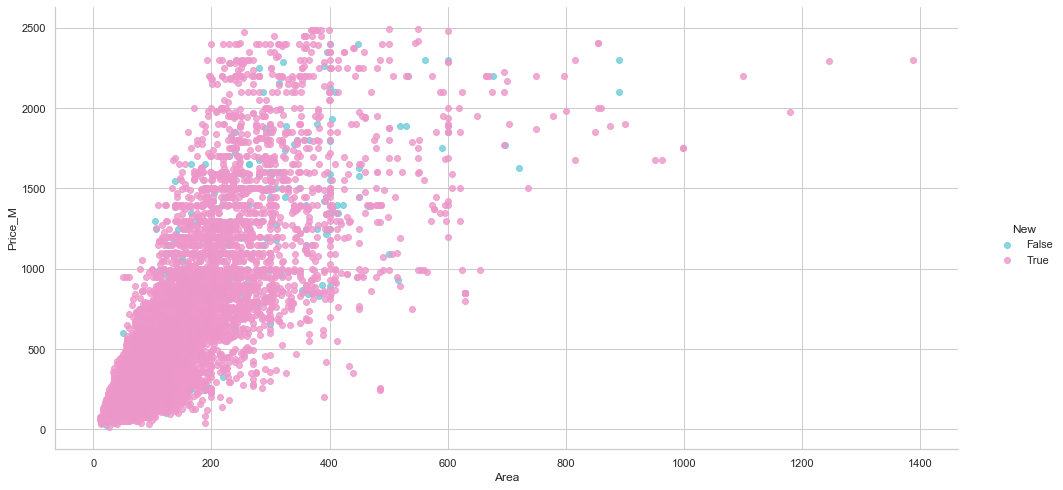

In [39]:
df3 = df2.copy()
df3 = df3[df3['Price_M'] < 2500]
df3 = df3[df3['Area'] < 1500]
sns.set_style('whitegrid')
sns.color_palette("Set1")
g=sns.lmplot('Area','Price_M',data=df3, hue='New',
            size=10, aspect=1, fit_reg=False)
g.fig.set_figwidth(15.27)
g.fig.set_figheight(6.7)

In [40]:
df3['Price_M'].describe()

count    41467.000000
mean       389.287131
std        362.661426
min         13.000000
25%        160.000000
50%        267.900000
75%        470.000000
max       2495.000000
Name: Price_M, dtype: float64

In [41]:
df3['Area'].describe()

count    41467.000000
mean       102.767888
std         73.451457
min         12.000000
25%         62.000000
50%         82.000000
75%        117.000000
max       1387.000000
Name: Area, dtype: float64

In [42]:
price_mean = round(np.mean(df3['Price_M']),2)
print('The price_original mean on the housing is:', price_mean)

The price_original mean on the housing is: 389.29


In [43]:
price_median = round(np.median(df3['Price_M']),2)
print('The price mean on the housing is:', price_median)

The price mean on the housing is: 267.9


<Figure size 792x504 with 0 Axes>

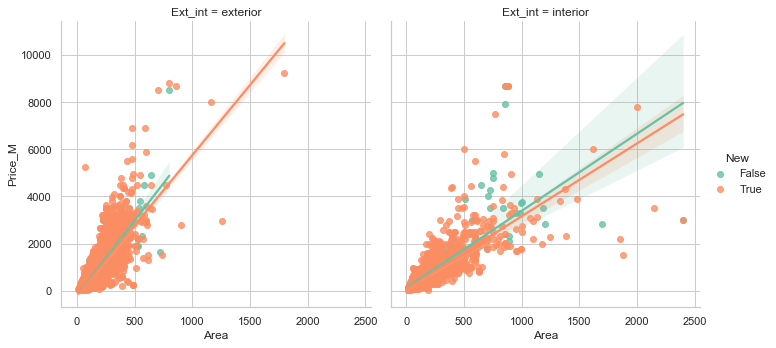

In [44]:
plt.figure(figsize=(11,7))
sns.lmplot(y='Price_M', x='Area', data=df2, hue='New',
           col='Ext_int',palette='Set2')

<Figure size 792x504 with 0 Axes>

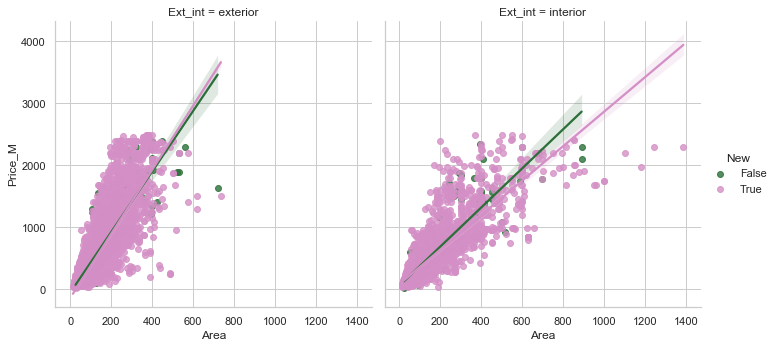

In [45]:
plt.figure(figsize=(11,7))
sns.lmplot(y='Price_M', x='Area', data=df3, hue='New',
           col='Ext_int',palette='cubehelix')

### Uderstanding the dataset: Big Picture Correlations

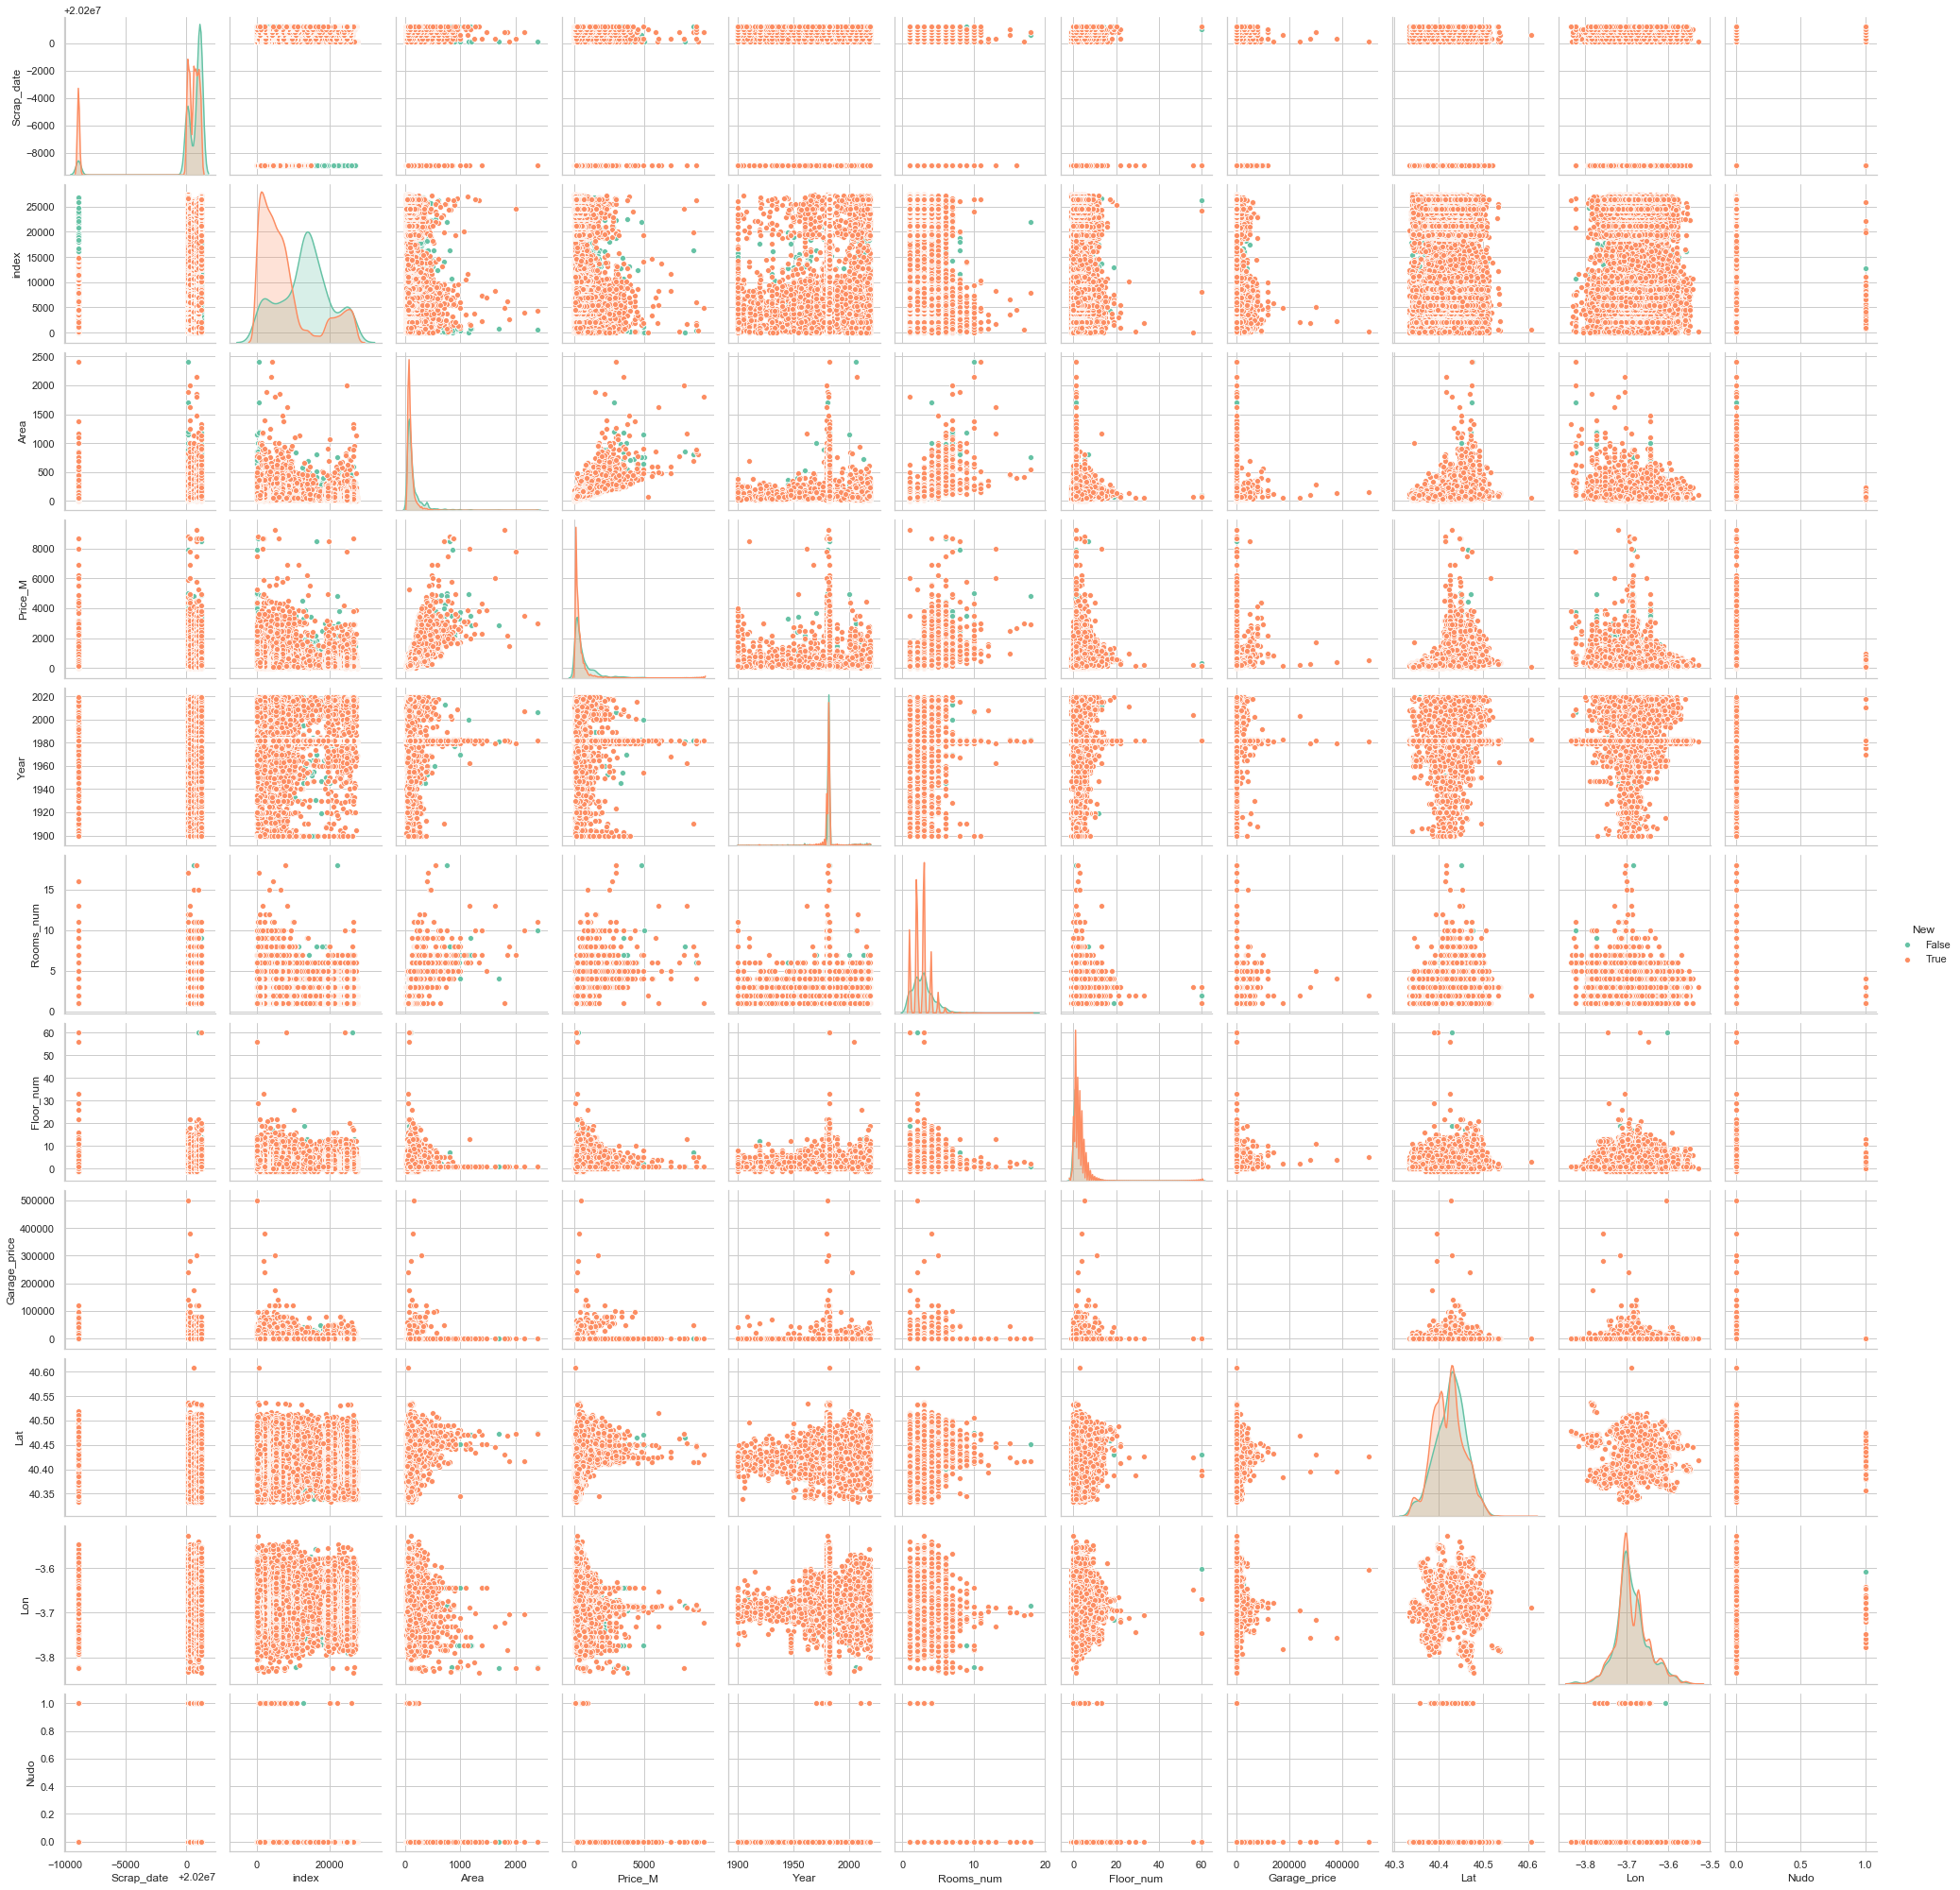

In [46]:
sns.set_style('whitegrid')
sns.pairplot(df2, hue='New', palette = 'Set2') 

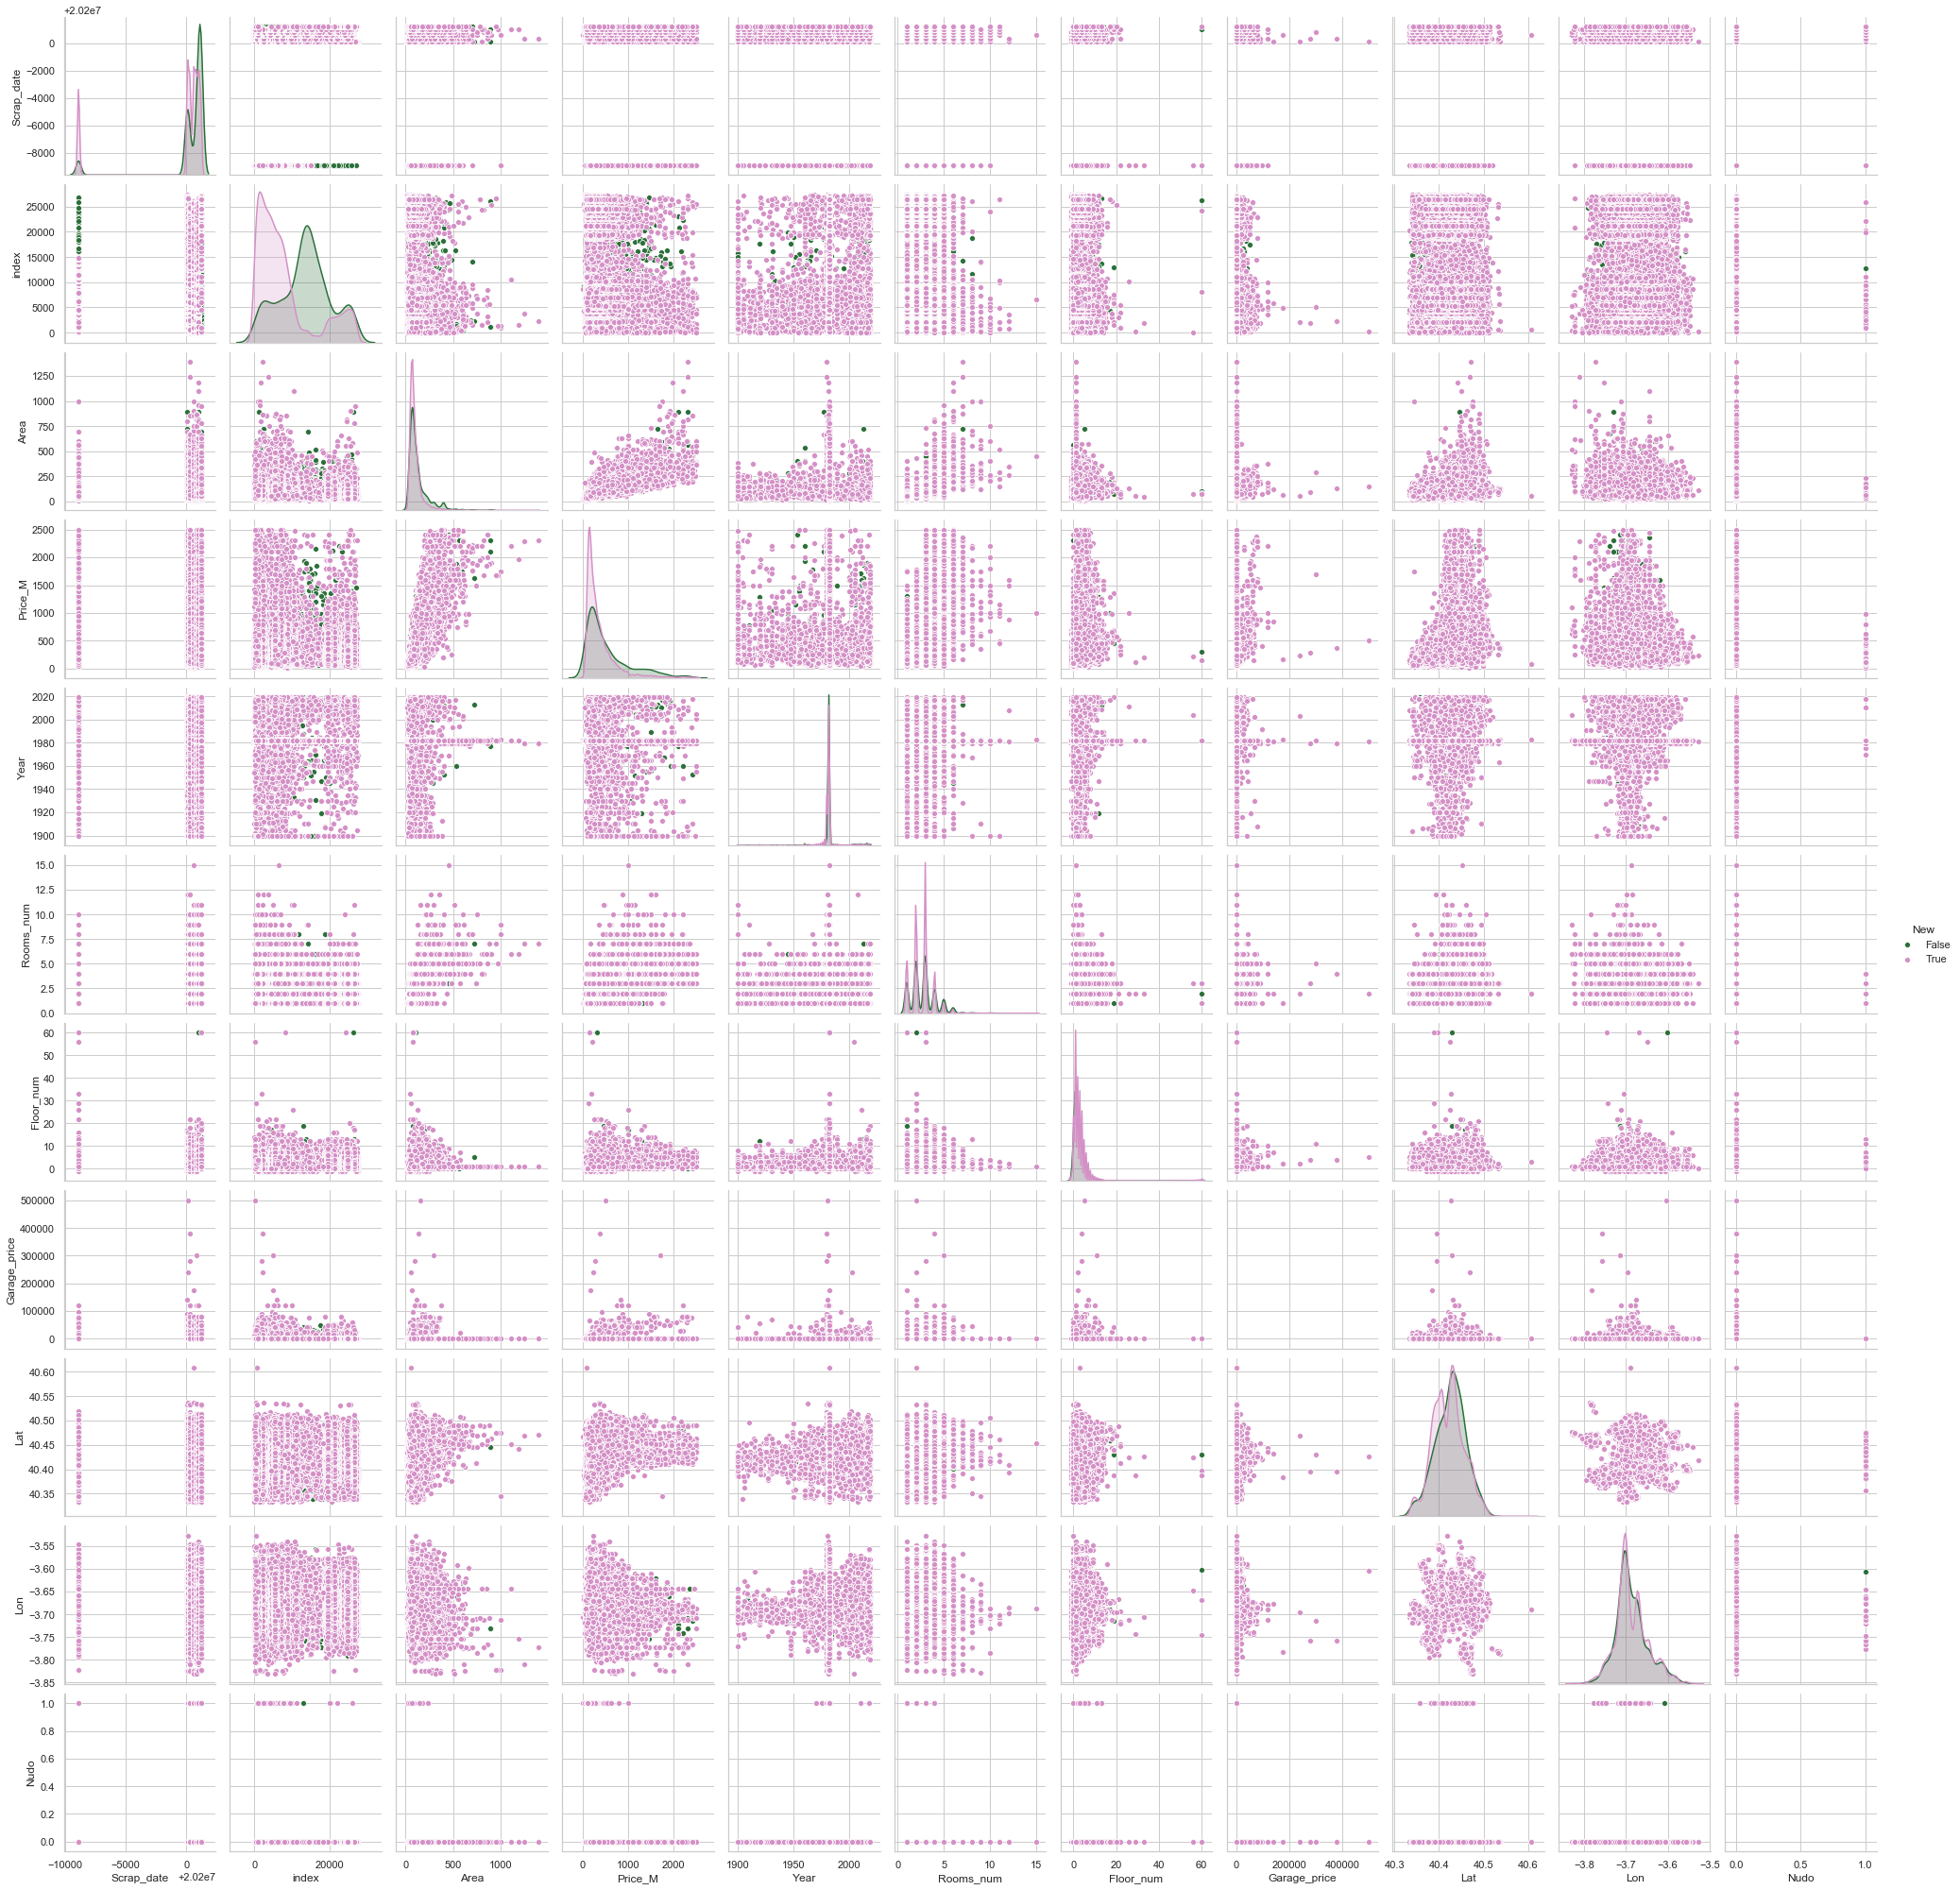

In [47]:
sns.set_style('whitegrid')
sns.pairplot(df3, hue='New', palette = 'cubehelix') 

 ### What is the mean and median price of a house in Madrid? Why and how do they differ?

In [48]:
# percentile list 
perc =[.20, .40, .60, .80]
# list of dtypes to include 
include =['object', 'float', 'int']

In [49]:
price_mean = round(np.mean(dataset['Price']),2)
print('The price_original mean on the housing is:', price_mean)

The price_original mean on the housing is: 426010.7


In [50]:
price_mean = round(np.mean(df2['Price_M']),2)
print('The price mean on the housing is:', price_mean)

The price mean on the housing is: 425.88


In [51]:
price_median = np.median(dataset['Price'])
print('The price media on the housing is:', price_median)

The price media on the housing is: 270000.0


In [52]:
price_median = np.median(df2['Price_M'])
print('The price media on the housing is:', price_median)

The price media on the housing is: 270.0


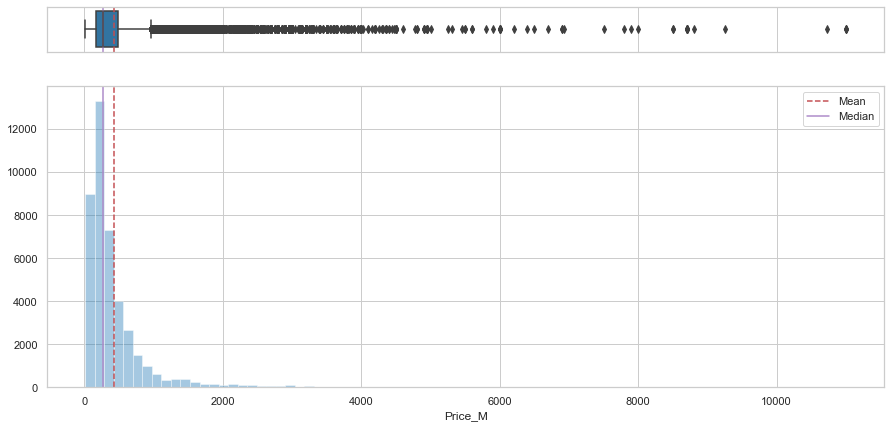

In [53]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('tab10')
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(15,7), sharex=True, gridspec_kw= {"height_ratios": (0.3, 2)})
mean=dataset['Price_M'].mean()
median=dataset['Price_M'].median()


sns.boxplot(dataset["Price_M"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color="#ad8bc9", linestyle='-')

sns.distplot(dataset["Price_M"], ax=ax_hist, kde=False, bins=80)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color="#ad8bc9", linestyle='-')


plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()


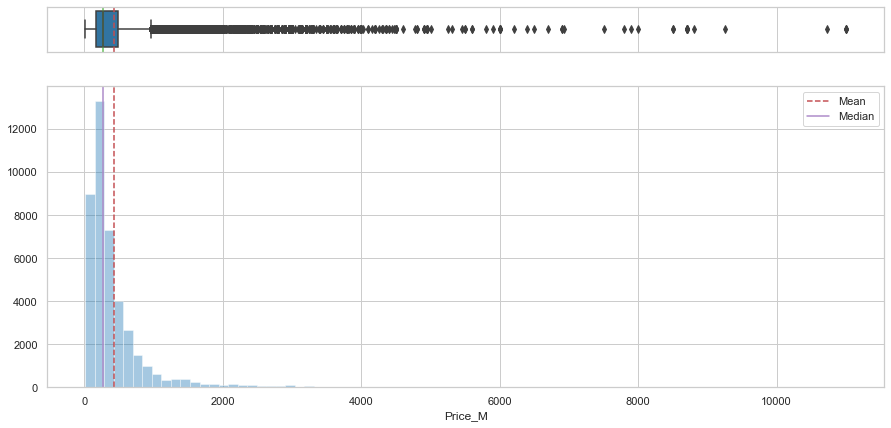

In [54]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')
sns.color_palette("Set2")
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(15,7), sharex=True, gridspec_kw= {"height_ratios": (0.3, 2)})
mean=df2['Price_M'].mean()
median=df2['Price_M'].median()


sns.boxplot(df2["Price_M"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color="#67bf5c", linestyle='-')

sns.distplot(df2["Price_M"], ax=ax_hist, kde=False, bins=80)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color="#ad8bc9", linestyle='-')


plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()


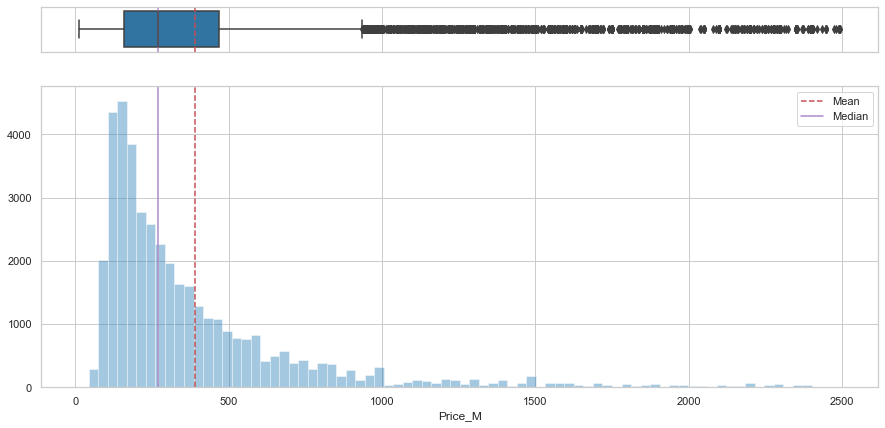

In [55]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(15,7), sharex=True, gridspec_kw= {"height_ratios": (0.3, 2)})
mean=df3['Price_M'].mean()
median=df3['Price_M'].median()


sns.boxplot(df3["Price_M"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color="#ad8bc9", linestyle='-')

sns.distplot(df3["Price_M"], ax=ax_hist, kde=False, bins=80)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color="#ad8bc9", linestyle='-')


plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()


In [56]:
price_mean = round(np.mean(df3['Price_M']),2)
print('The price mean on the housing is:', price_mean)

The price mean on the housing is: 389.29


In [57]:
price_mean = round(np.mean(df2['Price_M']),2)
print('The price mean on the housing is:', price_mean)

The price mean on the housing is: 425.88


In [58]:
price_median = np.median(df3['Price_M'])
print('The price media on the housing is:', price_median)

The price media on the housing is: 267.9


In [59]:
price_median = np.median(df2['Price_M'])
print('The price media on the housing is:', price_median)

The price media on the housing is: 270.0


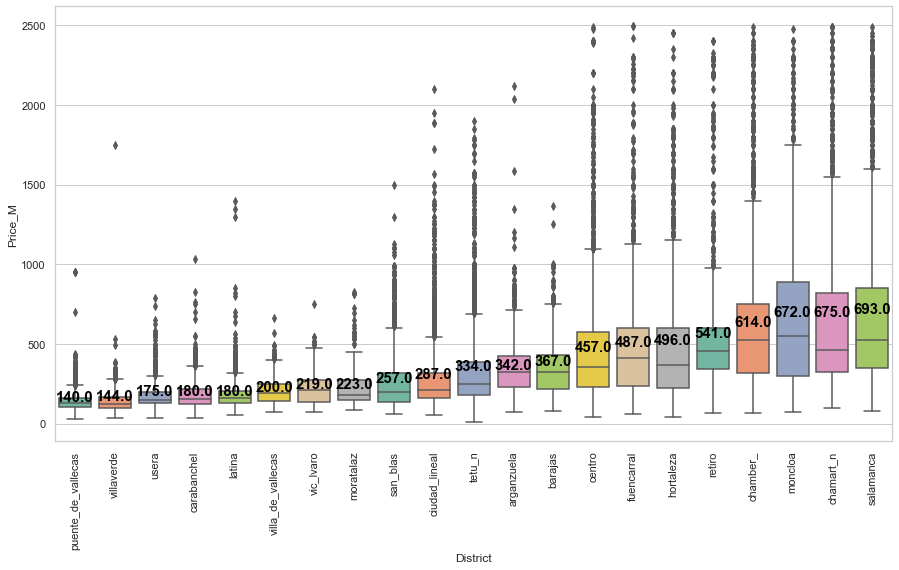

In [60]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,8))
sns.set(font_scale=1.8)
sns.set_palette('cubehelix')

sorted_nb = round(df3.groupby(['District'])['Price_M'].mean()).sort_values()
plt.setp(ax.get_xticklabels(), rotation=90)
box_plot = sns.boxplot(x = 'District', y = 'Price_M', data=df3, palette = "Set2", order=list(sorted_nb.index))


means = round(df3.groupby(['District'])['Price_M'].mean()).sort_values()
medians = round(df3.groupby(['District'])['Price_M'].median())#.sort_values()
vertical_offset = df3['Price_M'].mean() * 0.001 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick] + vertical_offset, means[xtick], 
            horizontalalignment = 'center', size = 'x-small', color='black', weight = 'semibold')
#for xtick in box_plot.get_xticks():
#    box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
#            horizontalalignment = 'center', size = 'x-small', color='green', weight = 'semibold')    

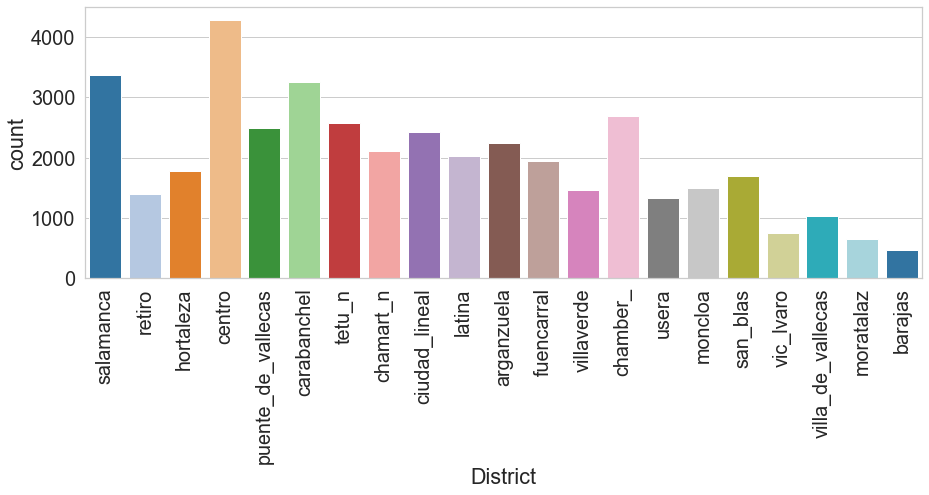

In [66]:
plt.figure(figsize=(15,5))
ax1 = sns.countplot(x='District', data=df3, palette=tableau20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
sns.set_style("whitegrid") 

In [84]:
df3['Price_Sq_K_sqm'] = df3['Price_M']/df3['Area']

In [80]:
Q20 = df3['Area'].quantile(0.20)
Q40 = df3['Area'].quantile(0.40)
Q60 = df3['Area'].quantile(0.60)
Q80 = df3['Area'].quantile(0.80)

print(Q20, Q40, Q60, Q80)

59.0 74.0 93.0 129.0


In [81]:
def Q_area(price):
    if price <= Q20:
        return 'Below 59sqmts'
    if (price > Q20) & (price <= Q40):
        return 'Between 59sqmts & 74sqmts'
    elif (price > Q40) & (price <= Q60):
        return 'Between 74sqmts & 93sqmts'
    elif (price > Q60) & (price <= Q80):
        return 'Between 93sqmts& 129sqmts'
    else:
        return 'Over 129sqmts'
    
#======================================

df3['Area_Q'] = df3[['Area']].applymap(lambda x : Q_area(x))
df3['Area_Q'].value_counts()

Below 59sqmts                8558
Over 129sqmts                8286
Between 74sqmts & 93sqmts    8237
Between 59sqmts & 74sqmts    8194
Between 93sqmts& 129sqmts    8192
Name: Area_Q, dtype: int64

In [76]:
Q15 = df3['Price_M'].quantile(0.15)
Q30 = df3['Price_M'].quantile(0.30)
Q45 = df3['Price_M'].quantile(0.45)
Q60 = df3['Price_M'].quantile(0.60)
Q75 = df3['Price_M'].quantile(0.75)
Q90 = df3['Price_M'].quantile(0.90)
print(Q15, Q30, Q45, Q60, Q75, Q90)

135.0 178.0 240.0 329.0 470.0 790.0


In [77]:
def Q_price(price):
    if price <= Q15:
        return 'Below 135K'
    if (price > Q15) & (price <= Q30):
        return 'Between 135K & 178K'
    elif (price > Q30) & (price <= Q45):
        return 'Between 178K & 240K'
    elif (price > Q45) & (price <= Q60):
        return 'Between 240K & 329K'
    elif (price > Q60) & (price <= Q75):
        return 'Between 329K & 470K'
    elif (price > Q75) & (price <= Q90):
        return 'Between 470K & 790K'
    else:
        return 'Over 790K'
    
#======================================

df3['Price_Q'] = df3[['Price_M']].applymap(lambda x : Q_price(x))
df3['Price_Q'].value_counts()

Below 135K             6516
Between 178K & 240K    6321
Between 329K & 470K    6280
Between 240K & 329K    6157
Between 470K & 790K    6123
Between 135K & 178K    5928
Over 790K              4142
Name: Price_Q, dtype: int64

In [85]:
Q25 = df3['Price_Sq_K_sqm'].quantile(0.25)
Q50 = df3['Price_Sq_K_sqm'].quantile(0.50)
Q75 = df3['Price_Sq_K_sqm'].quantile(0.75)
print(Q25, Q50, Q45, Q75)

2.3125 3.409090909090909 240.0 4.625


In [86]:
Q25 = round(df3['Price_Sq_K_sqm'].quantile(0.25))
Q50 = round(df3['Price_Sq_K_sqm'].quantile(0.50))
Q75 = round(df3['Price_Sq_K_sqm'].quantile(0.75))
print(Q25, Q50, Q75)

2.0 3.0 5.0


In [87]:
def Q_price_SqMts(price):
    if price <= Q15:
        return 'Below 2K'
    if (price > Q25) & (price <= Q50):
        return 'Between 2K & 3K'
    elif (price > Q50) & (price <= Q75):
        return 'Between 3K & 5K'
    else:
        return 'Over 5K'
    
#======================================

df3['Price_Q_sqmts'] = df3[['Price_Sq_K_sqm']].applymap(lambda x : Q_price_SqMts(x))
df3['Price_Q_sqmts'].value_counts()

Below 2K    41467
Name: Price_Q_sqmts, dtype: int64

### How are the floors and square meter distributed? What kind of distribution best fits them?

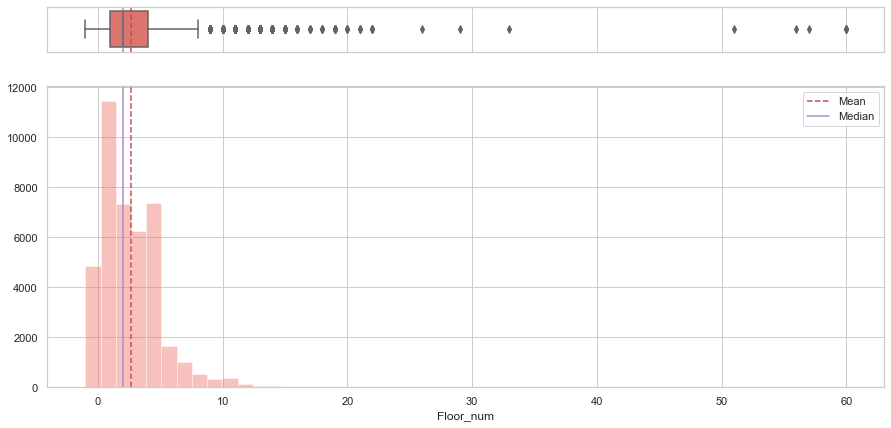

Valores únicos: count    41961.000000
mean         2.634804
std          2.394662
min         -1.000000
20%          1.000000
40%          2.000000
50%          2.000000
60%          3.000000
80%          4.000000
max         60.000000
Name: Floor_num, dtype: float64
Número de nulos: 0
Porcentaje de nulos: 0.0


In [88]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette(colors3)
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(15,7), sharex=True, gridspec_kw= {"height_ratios": (0.3, 2)})
mean=df3['Floor_num'].mean()
median=df3['Floor_num'].median()


sns.boxplot(df3["Floor_num"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color="#ad8bc9", linestyle='-')

sns.distplot(df3["Floor_num"], ax=ax_hist, kde=False, bins=50)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color="#ad8bc9", linestyle='-')


plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

print(f"Valores únicos: {df['Floor_num'].describe(percentiles = perc, include = include)}")
print(f"Número de nulos: {df3['Floor_num'].isna().sum()}")
print(f"Porcentaje de nulos: {round((((df3['Floor_num'].isna().sum())/df3['Floor_num'].size)*100), 2)}")

In [89]:
price_median = np.median(df3['Floor_num'])
print('The price media on the housing is:', price_median)

The price media on the housing is: 2.0


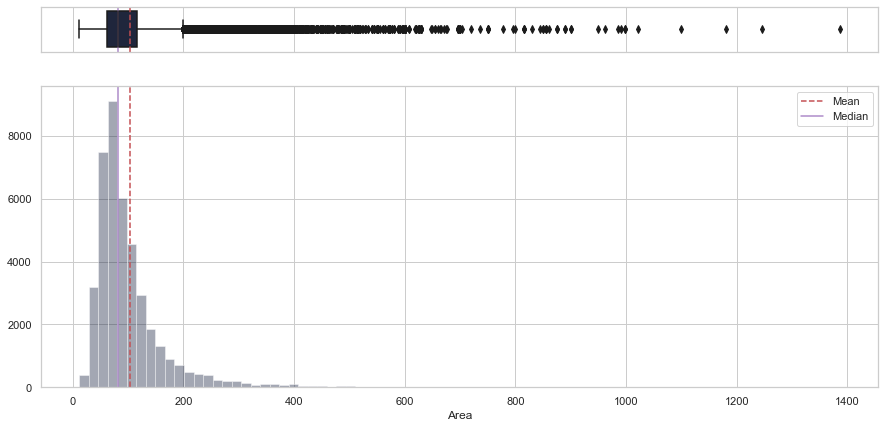

Valores únicos: count    41467.000000
mean       102.767888
std         73.451457
min         12.000000
20%         59.000000
40%         74.000000
50%         82.000000
60%         93.000000
80%        129.000000
max       1387.000000
Name: Area, dtype: float64
Número de nulos: 0
Porcentaje de nulos: 0.0


In [90]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('cubehelix')
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(15,7), sharex=True, gridspec_kw= {"height_ratios": (0.3, 2)})
mean=df3['Area'].mean()
median=df3['Area'].median()


sns.boxplot(df3["Area"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color="#ad8bc9", linestyle='-')

sns.distplot(df3["Area"], ax=ax_hist, kde=False, bins=80,)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color="#ad8bc9", linestyle='-')


plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()


print(f"Valores únicos: {df3['Area'].describe(percentiles = perc, include = include)}")
print(f"Número de nulos: {df3['Area'].isna().sum()}")
print(f"Porcentaje de nulos: {round((((df3['Area'].isna().sum())/df3['Area'].size)*100), 2)}")

In [91]:
price_median = np.median(df3['Area'])
print('The price media on the housing is:', price_median)

The price media on the housing is: 82.0


In [92]:
price_mean = np.median(df3['Area'])

In [93]:
df4 = df3[df3['Area'] < 500]

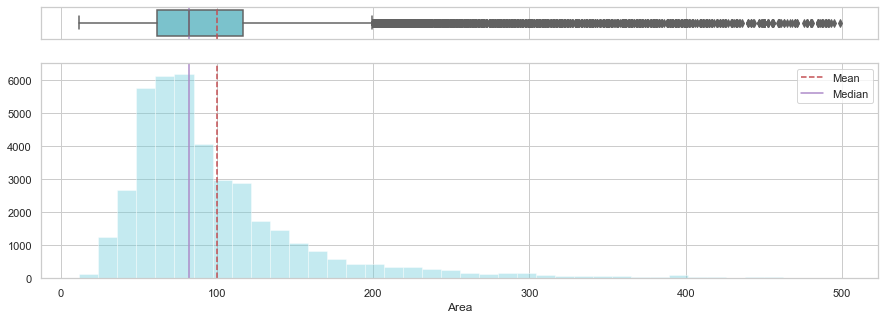

Valores únicos: count    41275.000000
mean       100.273773
std         63.016942
min         12.000000
20%         58.000000
40%         74.000000
50%         82.000000
60%         93.000000
80%        128.000000
max        499.000000
Name: Area, dtype: float64
Número de nulos: 0
Porcentaje de nulos: 0.0


In [94]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette(colors1)
f, (ax_box, ax_hist) = plt.subplots(2, figsize=(15,5), sharex=True, gridspec_kw= {"height_ratios": (0.3, 2)})
mean=df4['Area'].mean()
median=df4['Area'].median()


sns.boxplot(df4["Area"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color="#ad8bc9", linestyle='-')

sns.distplot(df4["Area"], ax=ax_hist, kde=False, bins=40,)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color="#ad8bc9", linestyle='-')


plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()



print(f"Valores únicos: {df4['Area'].describe(percentiles = perc, include = include)}")
print(f"Número de nulos: {df4['Area'].isna().sum()}")
print(f"Porcentaje de nulos: {round((((df4['Area'].isna().sum())/df4['Area'].size)*100), 2)}")

### What factors have the strongest influence on the price? Which ones on the price per square meter?

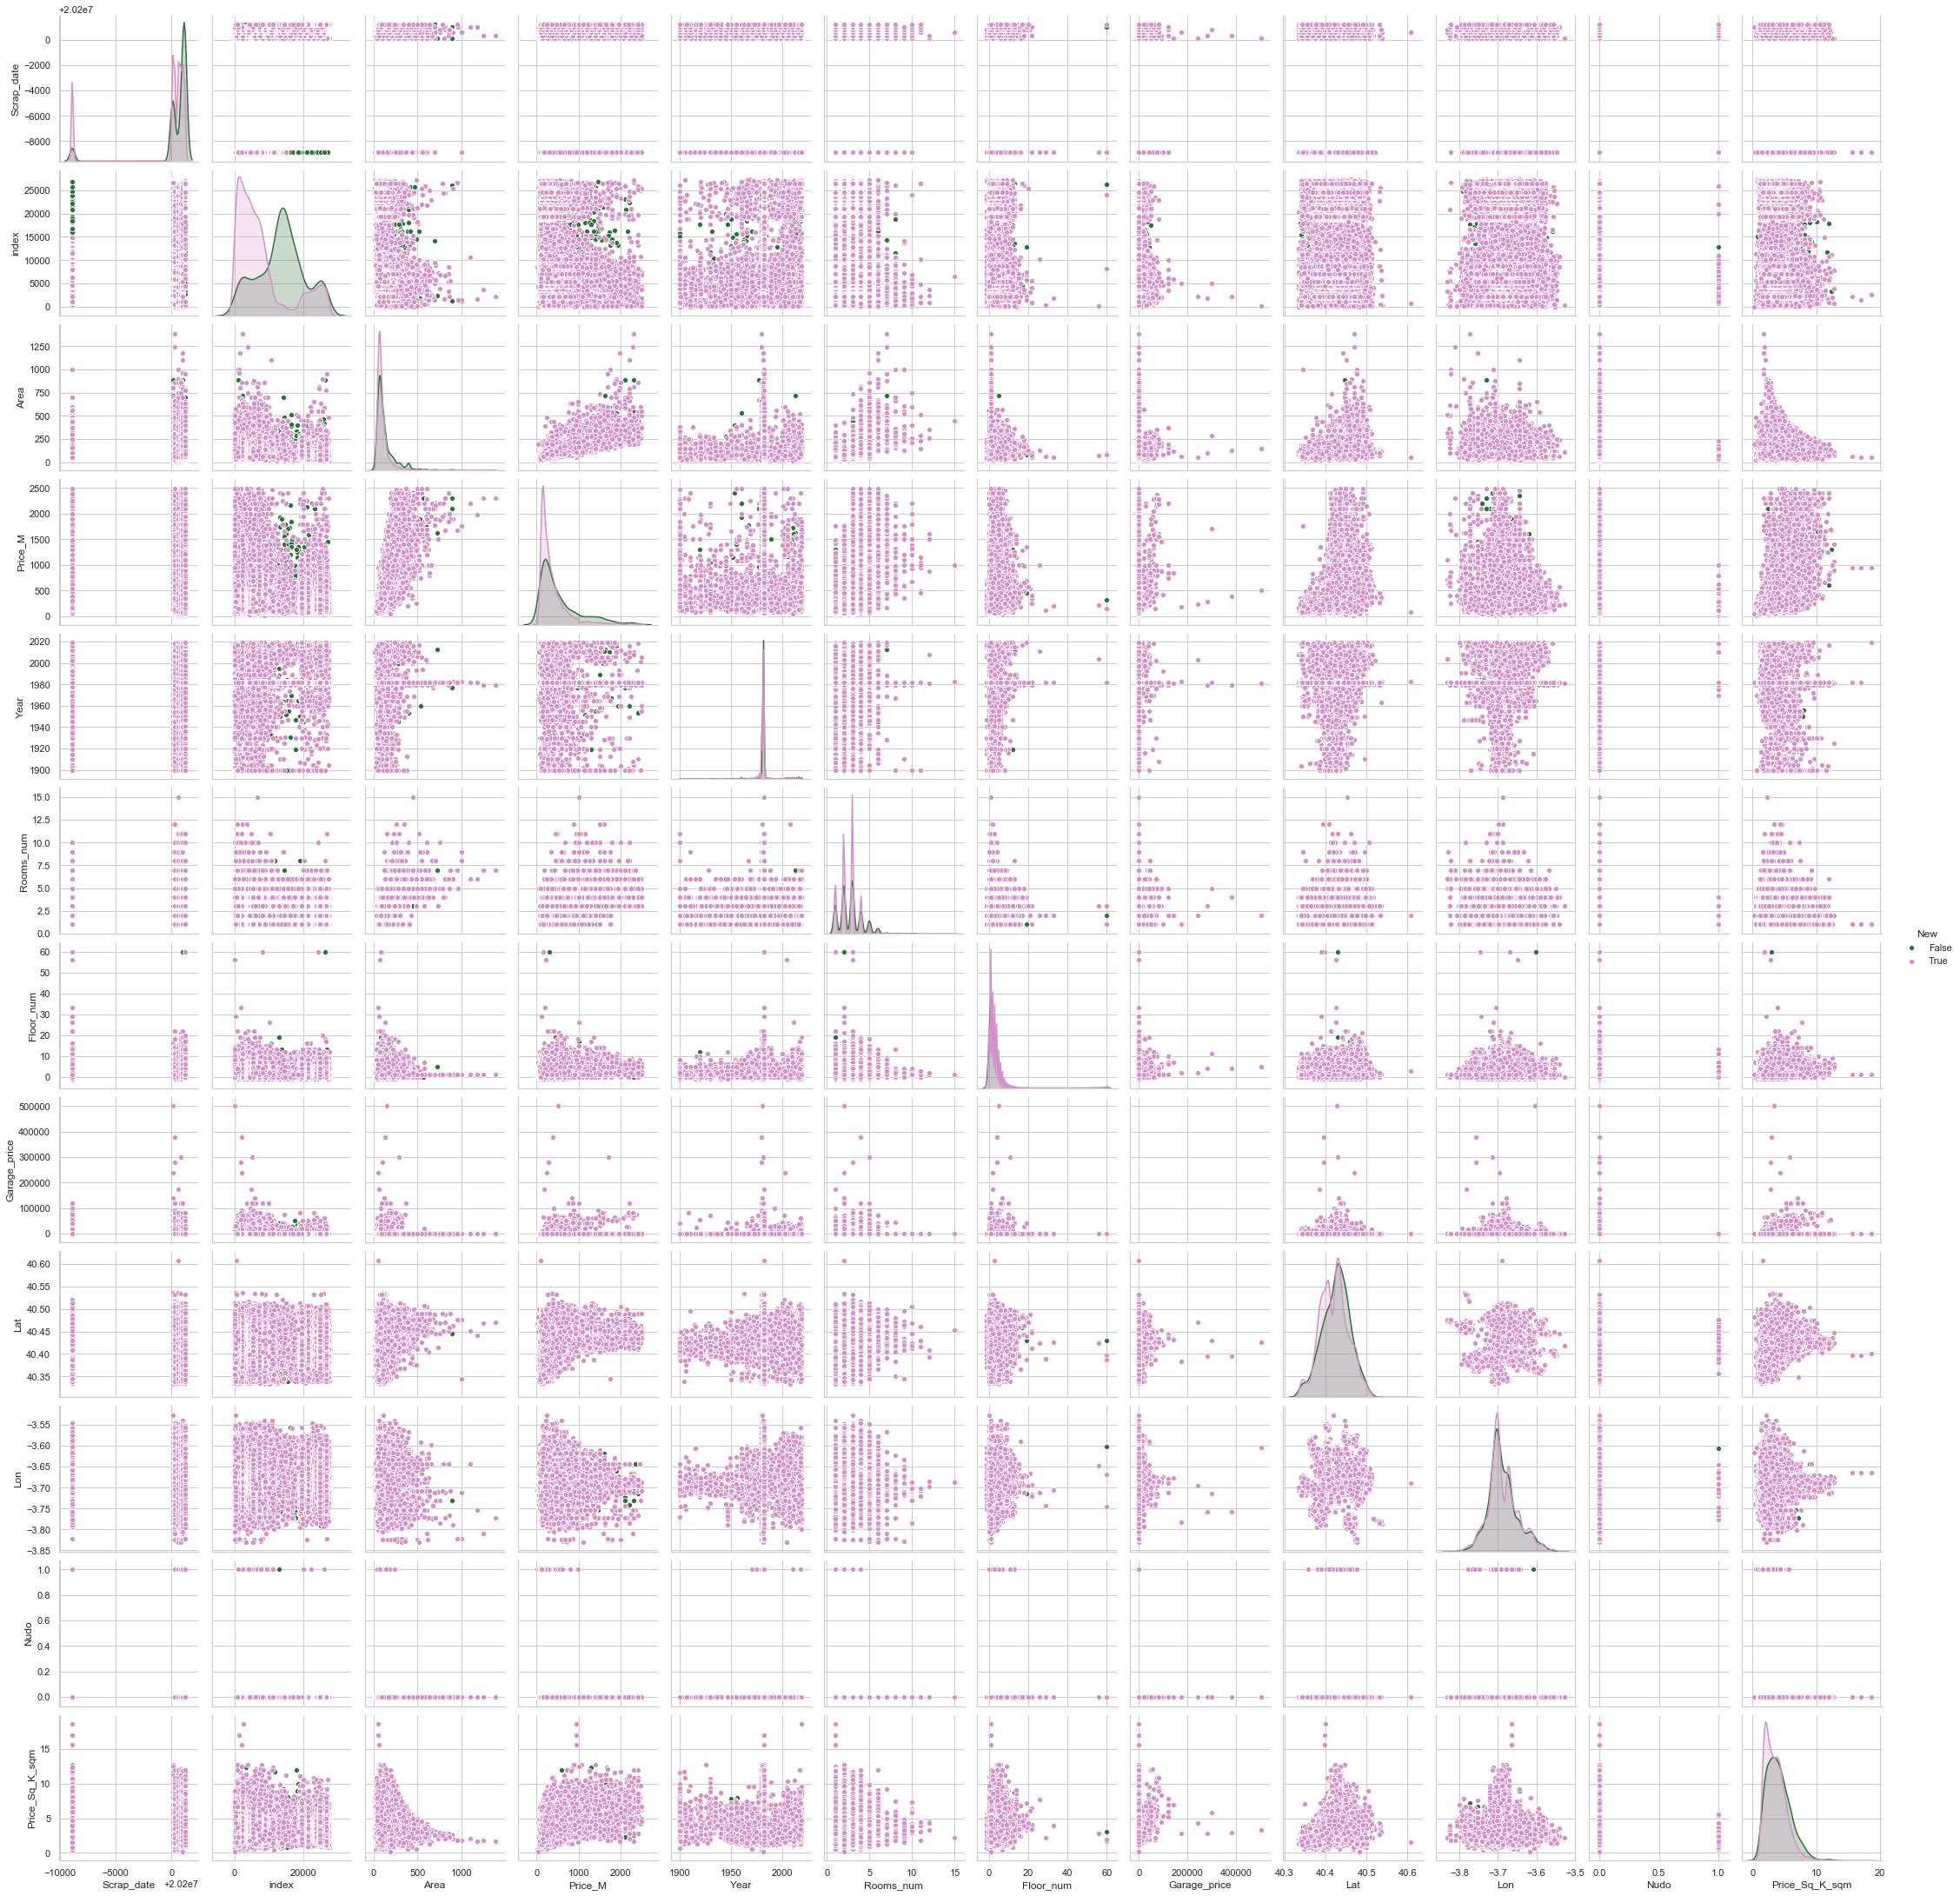

In [95]:
sns.set_style('whitegrid')
sns.pairplot(df3, hue='New', palette = 'cubehelix') 

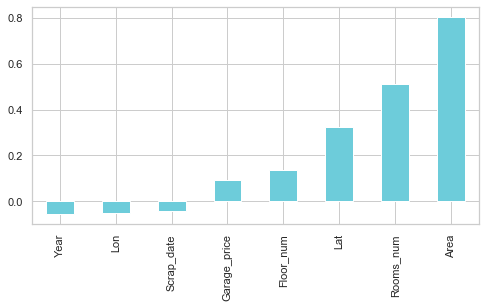

In [96]:
plt.figure(figsize=(8,4))
df3.corr()['Price_M'].sort_values().drop(['Price_M','index','Price_Sq_K_sqm', 'Nudo']).plot(kind='bar')

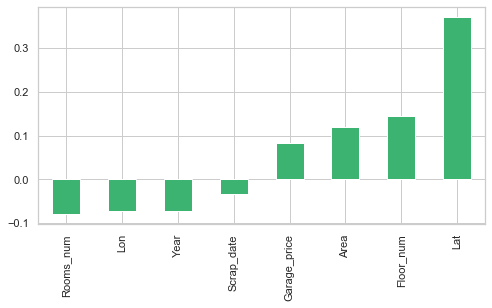

In [97]:
plt.figure(figsize=(8,4))
df3.corr()['Price_Sq_K_sqm'].sort_values().drop(['Price_M','Nudo','index','Price_Sq_K_sqm']).plot(kind='bar', color='MediumSeaGreen')

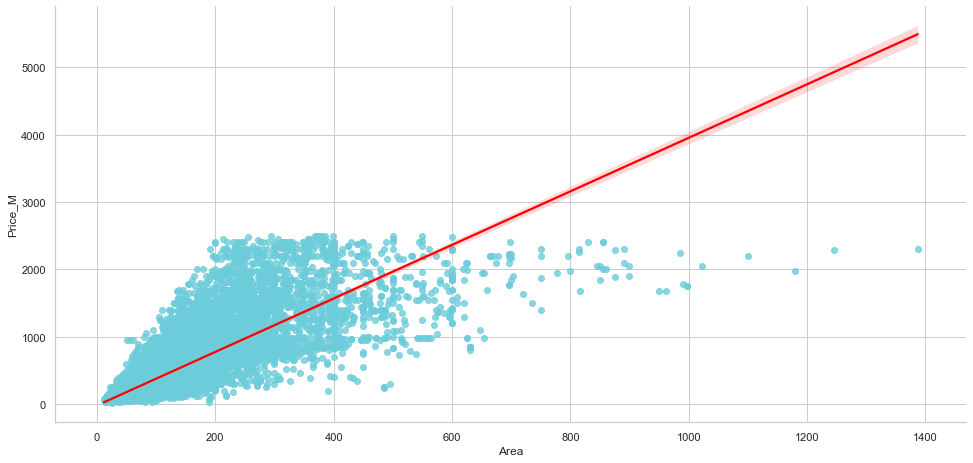

In [98]:
sns.set_style('whitegrid')
g=sns.lmplot('Area','Price_M',data=df3,
           palette='Set2',size=6,aspect=1,fit_reg=True, line_kws={'color': 'red'})
g.fig.set_figwidth(15.27)
g.fig.set_figheight(6.7)

In [99]:
r1 = np.corrcoef(df3['Area'], df3['Price_M'])
r1

array([[1.        , 0.80432319],
       [0.80432319, 1.        ]])

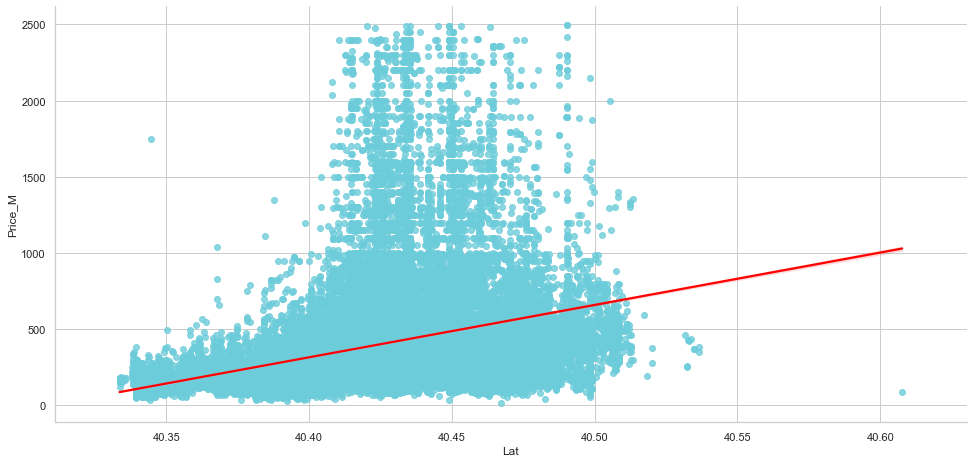

In [100]:
sns.set_style('whitegrid')
g=sns.lmplot('Lat','Price_M',data=df3,
           palette='Set2',size=6,aspect=1,fit_reg=True, line_kws={'color': 'red'})
g.fig.set_figwidth(15.27)
g.fig.set_figheight(6.7)

In [101]:
 r = np.corrcoef(df3['Lat'], df3['Price_M'])
r

array([[1.        , 0.32415437],
       [0.32415437, 1.        ]])

<Figure size 792x504 with 0 Axes>

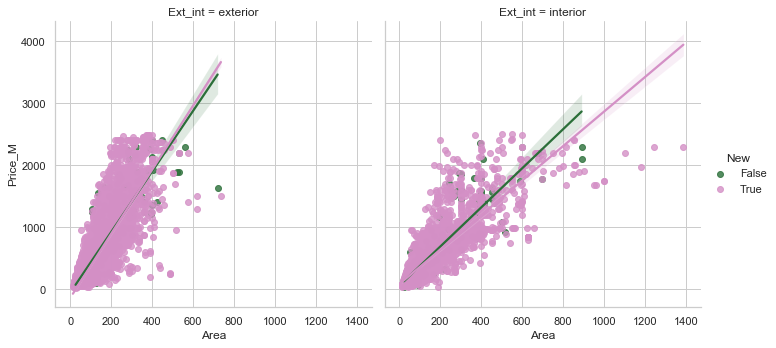

In [102]:
plt.figure(figsize=(11,7))
sns.set_style("whitegrid")
sns.lmplot(y='Price_M', x='Area', data=df3, hue='New',
           col='Ext_int',palette='cubehelix')

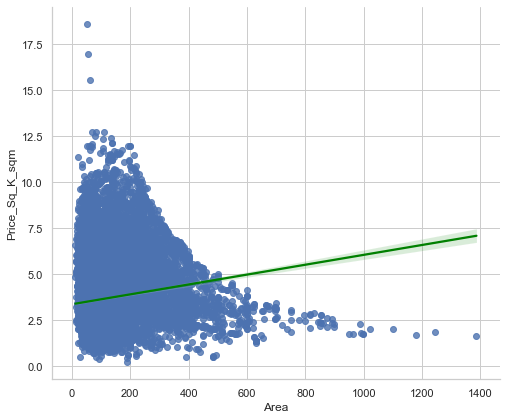

In [103]:
sns.set(color_codes=True)
sns.set_style('whitegrid')
g=sns.lmplot('Area','Price_Sq_K_sqm', data=df3,
           palette="#00cc66", size=6, aspect=1.2, fit_reg=True, line_kws={'color': 'green'})


In [104]:
 r = np.corrcoef(df3['Area'], df3['Price_Sq_K_sqm'])
r

array([[1.        , 0.11928087],
       [0.11928087, 1.        ]])

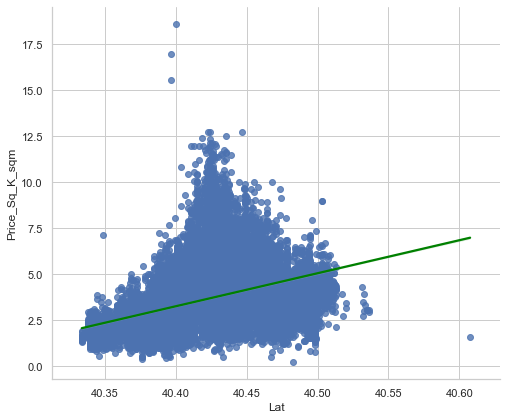

In [105]:
sns.set_style('whitegrid')

g=sns.lmplot('Lat','Price_Sq_K_sqm',data=df3,
           palette=colors4,size=6,aspect=1.2,fit_reg=True, line_kws={'color': 'green'})


In [106]:
 r = np.corrcoef(df3['Lat'], df3['Price_Sq_K_sqm'])
r

array([[1.        , 0.37132651],
       [0.37132651, 1.        ]])

<Figure size 792x504 with 0 Axes>

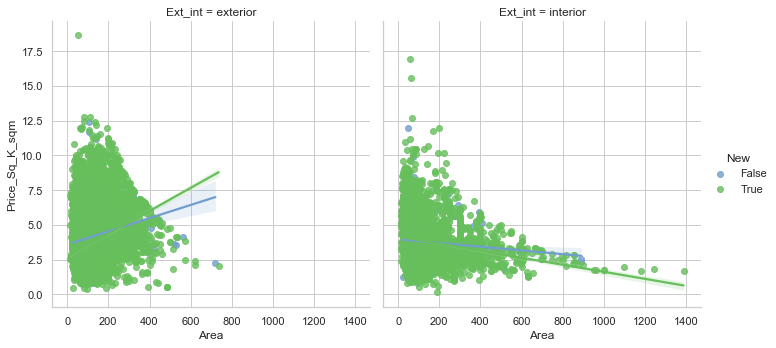

In [107]:
plt.figure(figsize=(11,7))
sns.set_style("whitegrid")
sns.lmplot(y='Price_Sq_K_sqm', x='Area', data=df3, hue='New',
           col='Ext_int',palette= colors4)

In [109]:
df3['DateTime'] = df3['Scrap_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df3

Scrap_date  index   Area               Quarter            District  \
0        20191004    120  189.0                 lista           salamanca   
1        20191004   9037   92.0              estrella              retiro   
2        20191004   9039  115.0           sanchinarro           hortaleza   
3        20191004   9048   85.0       chueca_justicia              centro   
4        20191004   9052   90.0             entrev_as  puente_de_vallecas   
...           ...    ...    ...                   ...                 ...   
41956    20201202  17697   65.0            campamento              latina   
41957    20201202  17660  123.0                   sol              centro   
41958    20201202  17763  120.0             orcasitas               usera   
41959    20201202  17671  120.0  malasa_a_universidad              centro   
41960    20201202  17757  284.0               almagro            chamber_   

       Price_M         Year  Rooms_num Elevator_class   Ext_int  Floor_num  \
0        920.0  1989.000000        4.0            con  exterior        1.0   
1        360.0  1982.965873        3.0            sin  exterior        2.0   
2        355.0  1982.965873        2.0            con  exterior        4.0   
3        430.0  1982.965873        2.0            sin  exterior        2.0   
4        149.9  1982.965873        3.0            con  exterior        3.0   
...        ...          ...        ...            ...       ...        ...   
41956    104.9  1947.000000        3.0            con  exterior        0.0   
41957    790.0  1919.000000        1.0            con  exterior        3.0   
41958    299.0  1982.134086        3.0            con  exterior        7.0   
41959    975.0  1982.134086        1.0            con  exterior        6.0   
41960   1300.0  1982.134086        4.0            con  exterior        3.0   

      Garage_opt_inc  Garage_price        Lat       Lon    New   Nudo  \
0                inc           0.0  40.431277 -3.676940    NaN  False   
1                  0           0.0  40.412180 -3.667154    NaN  False   
2                inc           0.0  40.488869 -3.647135    NaN  False   
3                  0           0.0  40.423765 -3.697799    NaN  False   
4                  0           0.0  40.380525 -3.668974    NaN  False   
...              ...           ...        ...       ...    ...    ...   
41956              0           0.0  40.398671 -3.772008  False  False   
41957              0           0.0  40.419036 -3.699779  False  False   
41958            inc           0.0  40.365346 -3.710498  False  False   
41959              0           0.0  40.423372 -3.707792  False  False   
41960              0           0.0  40.433862 -3.695287  False  False   

                                         Source URL   DateTime  \
0      https://www.idealista.com/inmueble/87208132/ 2019-10-04   
1      https://www.idealista.com/inmueble/86718709/ 2019-10-04   
2      https://www.idealista.com/inmueble/86718422/ 2019-10-04   
3      https://www.idealista.com/inmueble/86717146/ 2019-10-04   
4      https://www.idealista.com/inmueble/86716878/ 2019-10-04   
...                                             ...        ...   
41956  https://www.idealista.com/inmueble/91384490/ 2020-12-02   
41957  https://www.idealista.com/inmueble/91381081/ 2020-12-02   
41958  https://www.idealista.com/inmueble/91391616/ 2020-12-02   
41959  https://www.idealista.com/inmueble/91381925/ 2020-12-02   
41960  https://www.idealista.com/inmueble/91391009/ 2020-12-02   

                   Price_Q                     Area_Q  Price_Sq_K_sqm  \
0                Over 790K              Over 129sqmts        4.867725   
1      Between 329K & 470K  Between 74sqmts & 93sqmts        3.913043   
2      Between 329K & 470K  Between 93sqmts& 129sqmts        3.086957   
3      Between 329K & 470K  Between 74sqmts & 93sqmts        5.058824   
4      Between 135K & 178K  Between 74sqmts & 93sqmts        1.665556   
...                    ...           

In [129]:
means_date = round(df3.groupby(['DateTime'])['Price_M'].mean())
means_sd = round(df3.groupby(['Scrap_date'])['Price_M'].mean())
means_distr = round(df3.groupby(['District'])['Price_M'].mean())


In [130]:
dfmeans_date = pd.DataFrame(means_date)
dfmeans_distr = pd.DataFrame(means_distr)
dfmeans_sd = pd.DataFrame(means_sd)
dfmeans_sd['scrap_date'] = dfmeans_sd2.index
dfmeans_sd

Price_M  scrap_date
Scrap_date                     
20191004      420.0    20191004
20191129      378.0    20191129
20200105      387.0    20200105
20200129      391.0    20200129
20200320      398.0    20200320
20200628      362.0    20200628
20200822      369.0    20200822
20201021      379.0    20201021
20201202      368.0    20201202

In [131]:
means_date2 = round(df3.groupby(['DateTime'])['Price_Sq_K_sqm'].mean())
means_sd2 = round(df3.groupby(['Scrap_date'])['Price_Sq_K_sqm'].mean())
means_distr2 = round(df3.groupby(['District'])['Price_Sq_K_sqm'].mean())


In [132]:
dfmeans_date2 = pd.DataFrame(means_date2)
dfmeans_distr2 = pd.DataFrame(means_distr2)
dfmeans_sd2 = pd.DataFrame(means_sd2)
dfmeans_sd2['date_scp'] = dfmeans_sd2.index
dfmeans_sd2

Price_Sq_K_sqm  date_scp
Scrap_date                          
20191004               4.0  20191004
20191129               4.0  20191129
20200105               4.0  20200105
20200129               4.0  20200129
20200320               4.0  20200320
20200628               4.0  20200628
20200822               4.0  20200822
20201021               4.0  20201021
20201202               4.0  20201202

<Figure size 576x432 with 0 Axes>

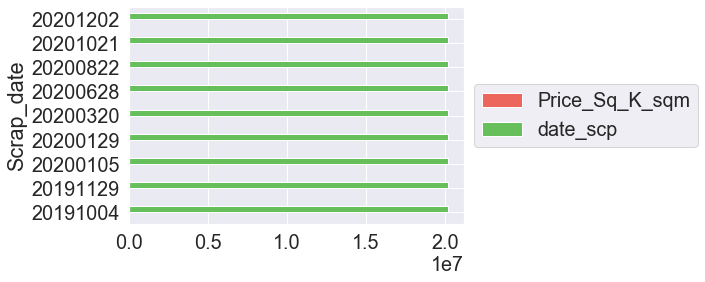

In [133]:
plt.figure(figsize=(8,6))
dfmeans_sd2.plot.barh().legend(loc='center left', bbox_to_anchor=(1, 0.5))

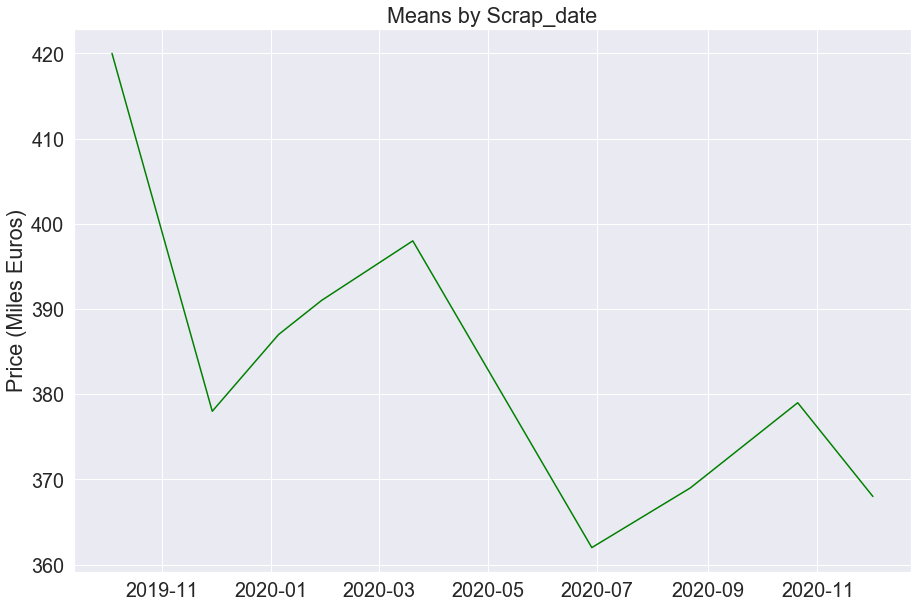

In [134]:
plt.figure(figsize=(15,10))
plt.plot(dfmeans_date.index, dfmeans_date['Price_M'], 'green')
plt.title('Means by Scrap_date')
plt.ylabel('Price (Miles Euros)');
plt.show()

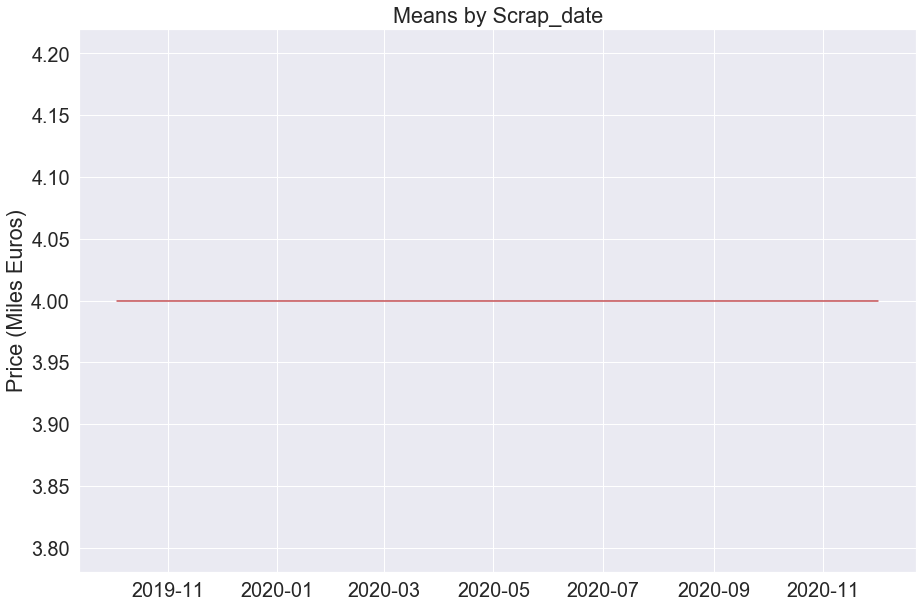

In [124]:
plt.figure(figsize=(15,10))
plt.plot(dfmeans_date2.index, dfmeans_date2['Price_Sq_K_sqm'], 'r')
plt.title('Means by Scrap_date')
plt.ylabel('Price (Miles Euros)');
plt.show()

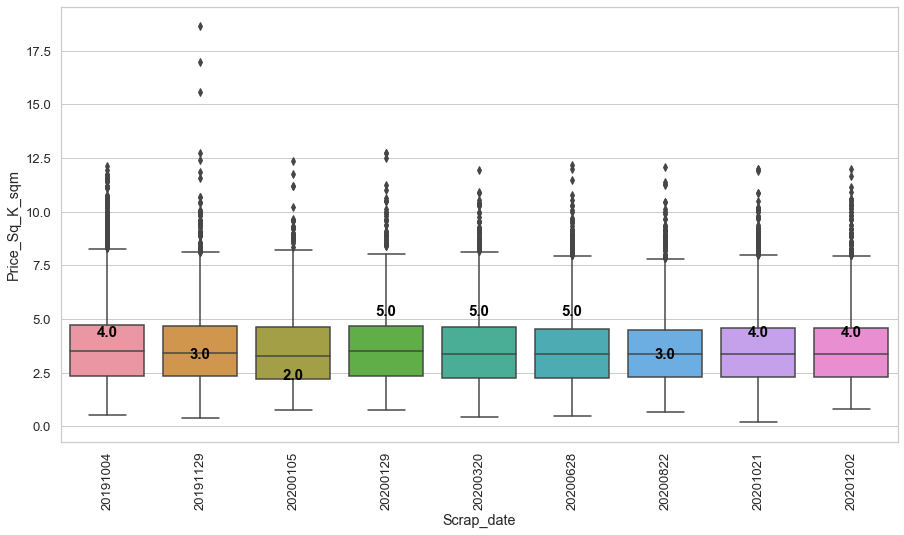

In [138]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,8))
sns.set(font_scale=1.8)
sns.set_palette(colors3)

plt.setp(ax.get_xticklabels(), rotation=90)
box_plot = sns.boxplot(x = 'Scrap_date', y = 'Price_Sq_K_sqm', data=df3)

means = round(df3.groupby(['District'])['Price_Sq_K_sqm'].mean())
vertical_offset = df3['Price_Sq_K_sqm'].mean() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick] + vertical_offset, means[xtick], 
            horizontalalignment = 'center', size = 'x-small', color='black', weight = 'semibold')

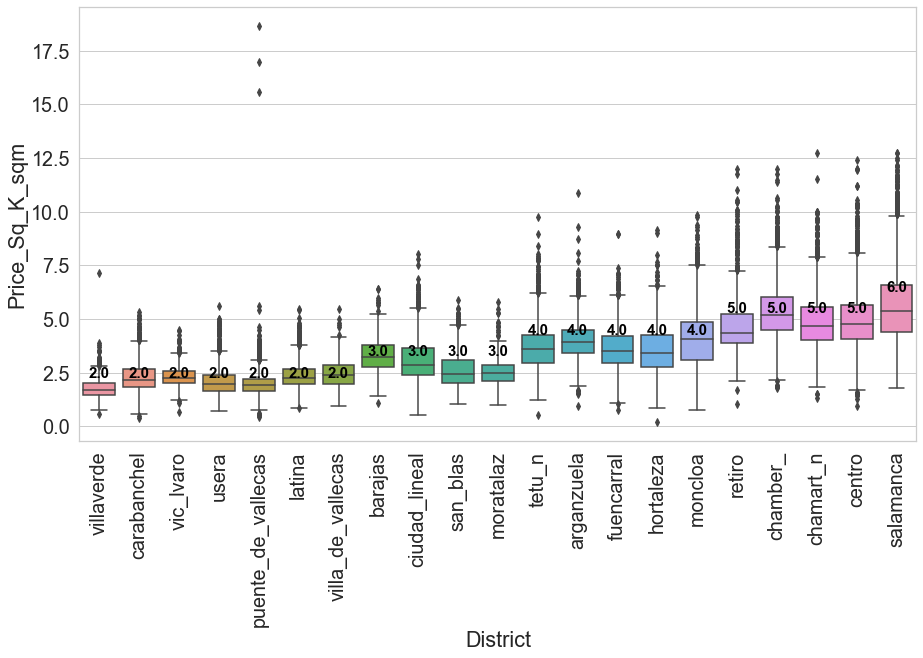

In [147]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15,8))
sns.set(font_scale=1.8)
sns.set_palette(colors3)

sorted_nb = round(df3.groupby(['District'])['Price_Sq_K_sqm'].mean()).sort_values()

plt.setp(ax.get_xticklabels(), rotation=90)
box_plot = sns.boxplot(x = 'District', y = 'Price_Sq_K_sqm', data=df3, order=list(sorted_nb.index))

means = round(df3.groupby(['District'])['Price_Sq_K_sqm'].mean()).sort_values()
vertical_offset = df3['Price_Sq_K_sqm'].mean() * 0.08 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, means[xtick] + vertical_offset, means[xtick], 
            horizontalalignment = 'center', size = 'x-small', color='black', weight = 'semibold')

In [ ]:
sns.set(font_scale=0.85)
sns.set_palette(colors3)
sns.set_style('whitegrid')
cond_plot = sns.FacetGrid(data=df3, col='District', hue='Ext_int', col_wrap=3)
cond_plot.map(sns.scatterplot, 'Area', 'Price_Sq_K_sqm')

In [141]:
df3['Scrap_date'].unique()

array([20191004, 20191129, 20200105, 20200129, 20200320, 20200628,
       20200822, 20201021, 20201202])

Text(0, 0.5, 'Scrap_date')

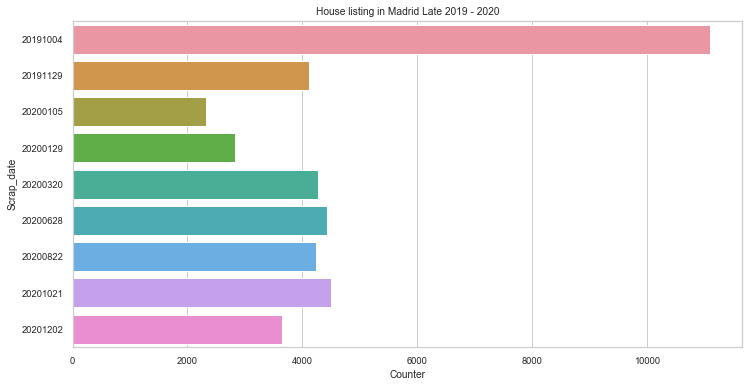

In [142]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
sns.color_palette("Paired")

tc = Counter(df3['Scrap_date'].tolist()).most_common(12)
tc_index = [table[0] for table in tc]
tc_values = [table[1] for table in tc]
sns.barplot(x = tc_values , y = tc_index,  orient = 'h')
plt.title('House listing in Madrid Late 2019 - 2020')
plt.xlabel('Counter')
plt.ylabel('Scrap_date')